In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('weatherAUS.csv')
df
data1=df.copy()

# Data Analysis

In [3]:
#nan features
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
features_nan

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [4]:
for feature in features_nan:
    print(feature,':', df[feature].isnull().sum())

MinTemp : 1485
MaxTemp : 1261
Rainfall : 3261
Evaporation : 62790
Sunshine : 69835
WindGustDir : 10326
WindGustSpeed : 10263
WindDir9am : 10566
WindDir3pm : 4228
WindSpeed9am : 1767
WindSpeed3pm : 3062
Humidity9am : 2654
Humidity3pm : 4507
Pressure9am : 15065
Pressure3pm : 15028
Cloud9am : 55888
Cloud3pm : 59358
Temp9am : 1767
Temp3pm : 3609
RainToday : 3261
RainTomorrow : 3267


MinTemp  RainTomorrow
0        No              109854
         Yes              31702
1        No                 462
         Yes                175
Name: RainTomorrow, dtype: int64


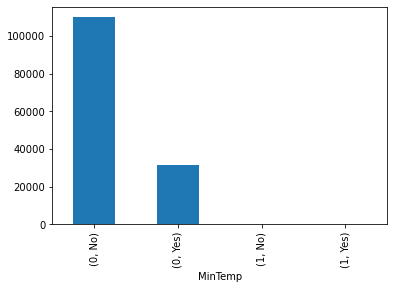

MaxTemp  RainTomorrow
0        No              110049
         Yes              31822
1        No                 267
         Yes                 55
Name: RainTomorrow, dtype: int64


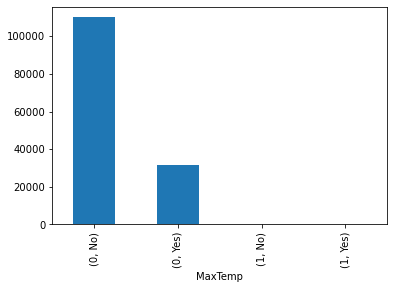

Rainfall  RainTomorrow
0         No              109586
          Yes              31201
1         No                 730
          Yes                676
Name: RainTomorrow, dtype: int64


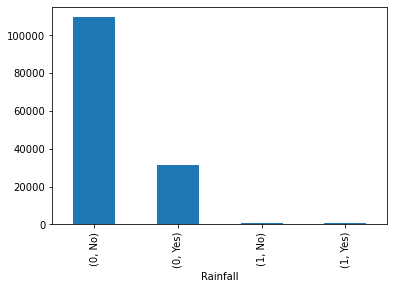

Evaporation  RainTomorrow
0            No              63491
             Yes             17859
1            No              46825
             Yes             14018
Name: RainTomorrow, dtype: int64


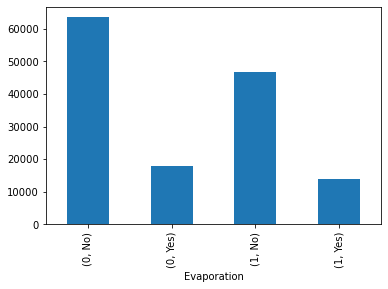

Sunshine  RainTomorrow
0         No              57556
          Yes             16821
1         No              52760
          Yes             15056
Name: RainTomorrow, dtype: int64


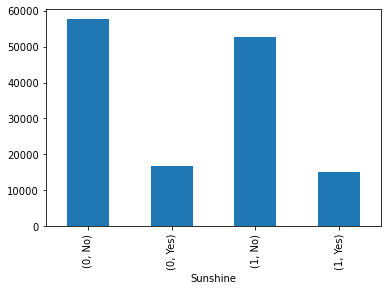

WindGustDir  RainTomorrow
0            No              103453
             Yes              29410
1            No                6863
             Yes               2467
Name: RainTomorrow, dtype: int64


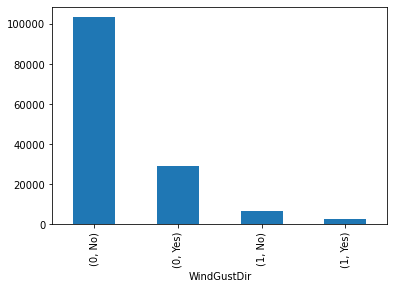

WindGustSpeed  RainTomorrow
0              No              103488
               Yes              29435
1              No                6828
               Yes               2442
Name: RainTomorrow, dtype: int64


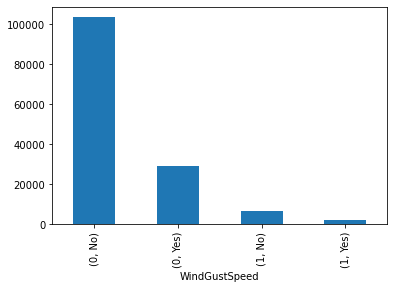

WindDir9am  RainTomorrow
0           No              102224
            Yes              29956
1           No                8092
            Yes               1921
Name: RainTomorrow, dtype: int64


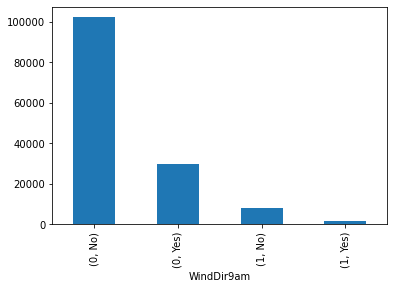

WindDir3pm  RainTomorrow
0           No              107591
            Yes              30824
1           No                2725
            Yes               1053
Name: RainTomorrow, dtype: int64


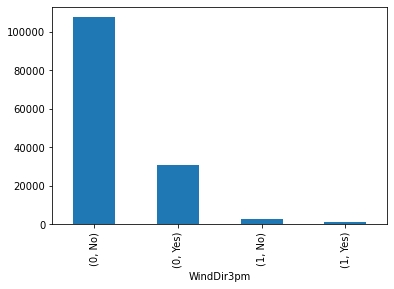

WindSpeed9am  RainTomorrow
0             No              109308
              Yes              31537
1             No                1008
              Yes                340
Name: RainTomorrow, dtype: int64


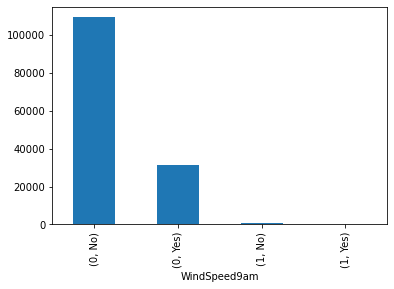

WindSpeed3pm  RainTomorrow
0             No              108369
              Yes              31194
1             No                1947
              Yes                683
Name: RainTomorrow, dtype: int64


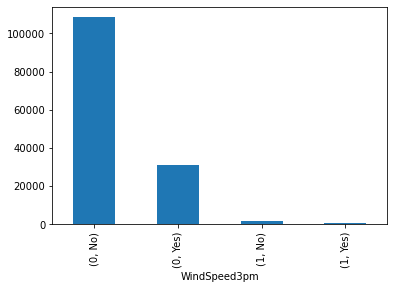

Humidity9am  RainTomorrow
0            No              109076
             Yes              31343
1            No                1240
             Yes                534
Name: RainTomorrow, dtype: int64


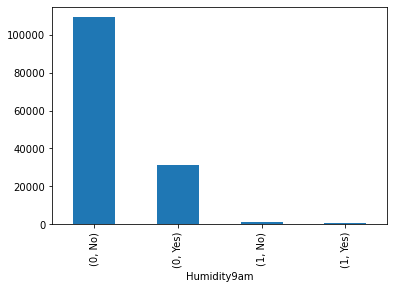

Humidity3pm  RainTomorrow
0            No              107670
             Yes              30913
1            No                2646
             Yes                964
Name: RainTomorrow, dtype: int64


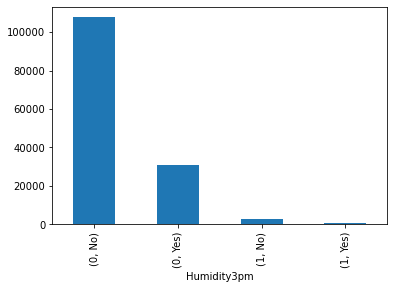

Pressure9am  RainTomorrow
0            No              99405
             Yes             28774
1            No              10911
             Yes              3103
Name: RainTomorrow, dtype: int64


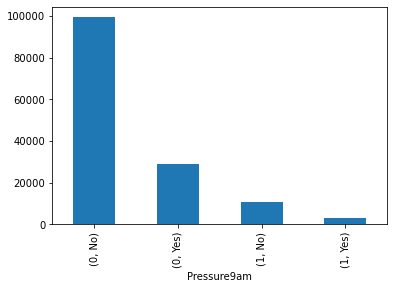

Pressure3pm  RainTomorrow
0            No              99448
             Yes             28764
1            No              10868
             Yes              3113
Name: RainTomorrow, dtype: int64


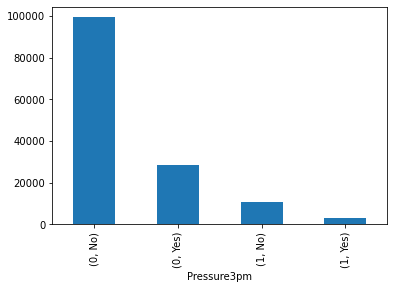

Cloud9am  RainTomorrow
0         No              67914
          Yes             20622
1         No              42402
          Yes             11255
Name: RainTomorrow, dtype: int64


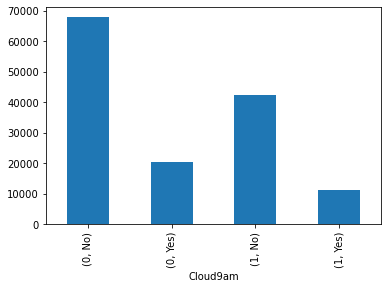

Cloud3pm  RainTomorrow
0         No              64811
          Yes             20288
1         No              45505
          Yes             11589
Name: RainTomorrow, dtype: int64


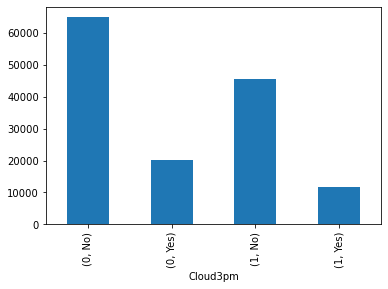

Temp9am  RainTomorrow
0        No              109710
         Yes              31579
1        No                 606
         Yes                298
Name: RainTomorrow, dtype: int64


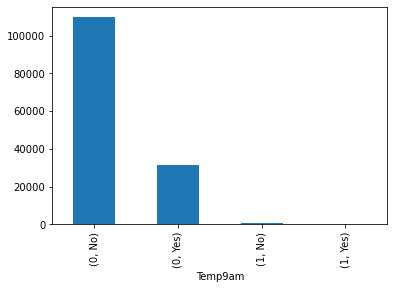

Temp3pm  RainTomorrow
0        No              108332
         Yes              31135
1        No                1984
         Yes                742
Name: RainTomorrow, dtype: int64


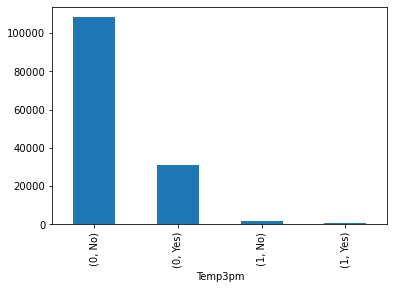

RainTomorrow  RainTomorrow
0             0               142193
1             1                 3267
Name: RainTomorrow, dtype: int64


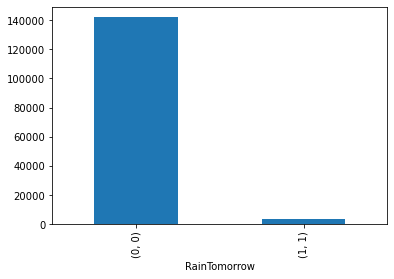

In [5]:
for feature in features_nan:
    if feature=='RainTomorrow':
        pass
    if feature=='RainToday':
        pass
    else:
        data=df.copy()
        data[feature]=np.where(data[feature].isnull(),1,0)
        
        data.groupby(feature)['RainTomorrow'].value_counts().plot.bar()
        print(data.groupby(feature)['RainTomorrow'].value_counts())
        plt.xlabel(feature)
        plt.show()

    

In [6]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
continuous_feature=[feature for feature in numerical_feature if df[feature].dtypes=='float']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]

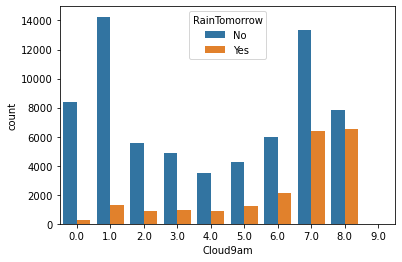

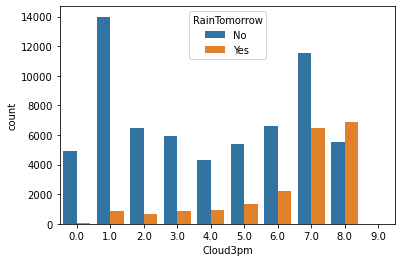

In [7]:
##discrete features
for feature in discrete_feature:
    sns.countplot(x=feature,hue='RainTomorrow',data=df)
    plt.show()

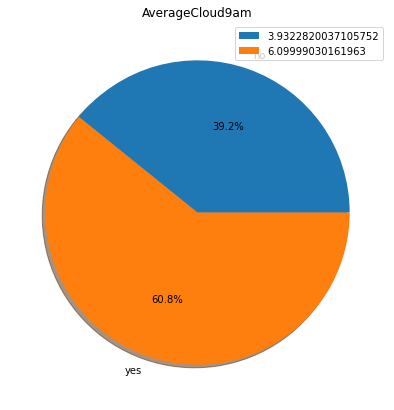

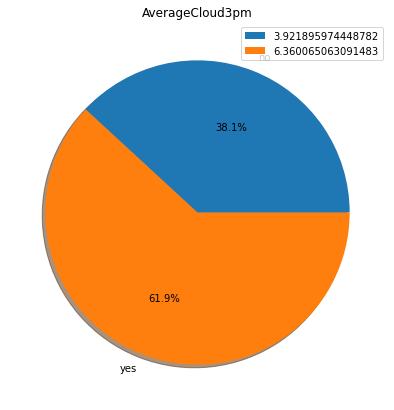

In [8]:
for feature in discrete_feature:
    plt.figure(figsize=(10, 7))
    death_age = df.groupby('RainTomorrow')[feature].mean()
    plt.pie(death_age, autopct='%.1f%%', labels=['no','yes'], shadow=True)
    plt.title('Average'+ feature)
    plt.legend(death_age, loc='upper right')
    plt.show()

In [9]:
data=df.copy()
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")
data['Year']=pd.DatetimeIndex(df.Date).year
data['date']=pd.DatetimeIndex(df.Date).day
data['month']=pd.DatetimeIndex(df.Date).month

In [10]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,date,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1005.4,NaN,NaN,20.6,28.9,No,No,2008,6,12
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,1008.2,1.0,NaN,18.1,24.6,No,No,2008,7,12
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,1010.1,NaN,NaN,16.3,25.5,No,No,2008,8,12
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1003.6,NaN,NaN,18.3,30.2,No,Yes,2008,9,12
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,1005.7,NaN,NaN,20.1,28.2,Yes,No,2008,10,12


<AxesSubplot:xlabel='Year,RainTomorrow'>

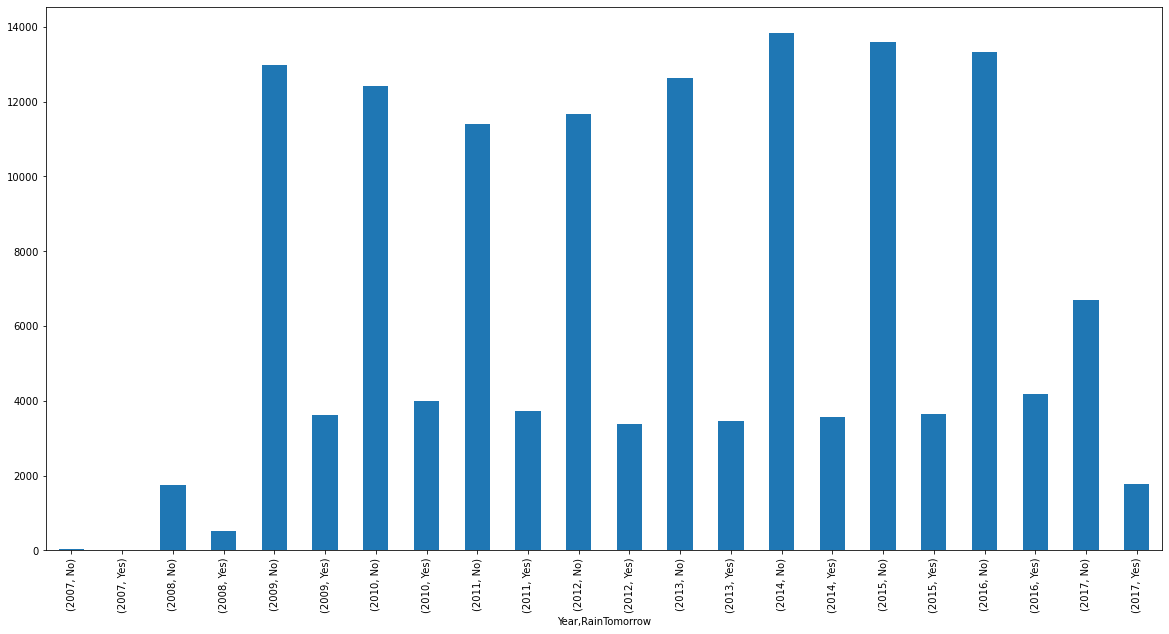

In [11]:
plt.figure(figsize = (20,10))
data.groupby('Year')['RainTomorrow'].value_counts().plot.bar()


<AxesSubplot:xlabel='month,RainTomorrow'>

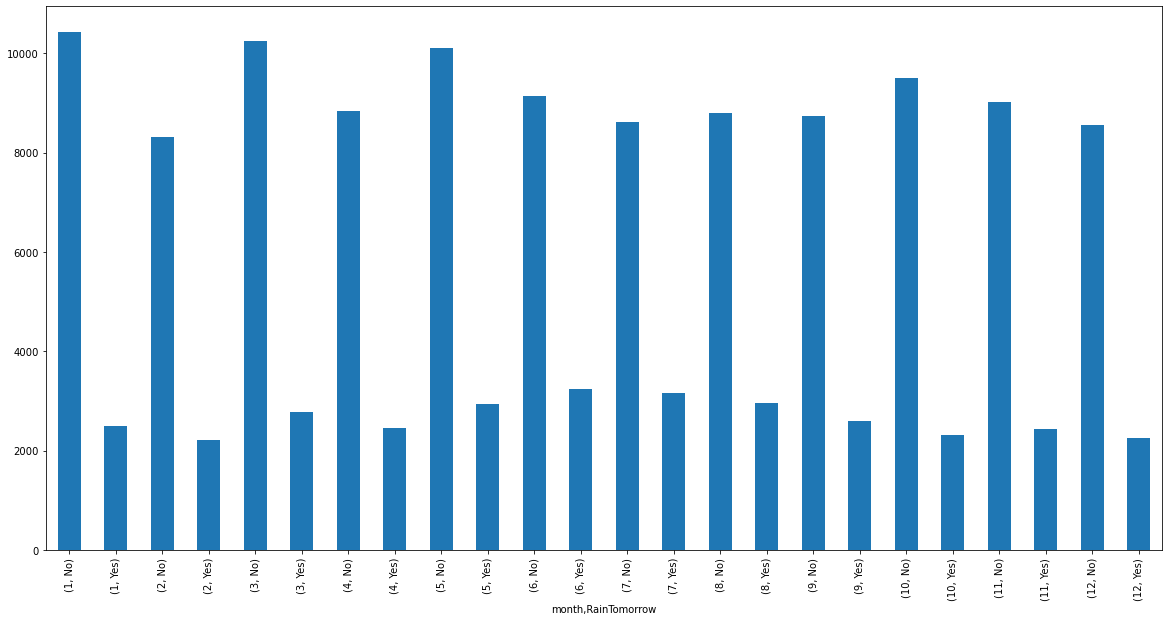

In [12]:
plt.figure(figsize = (20,10))
data.groupby('month')['RainTomorrow'].value_counts().plot.bar()


<AxesSubplot:xlabel='Year', ylabel='count'>

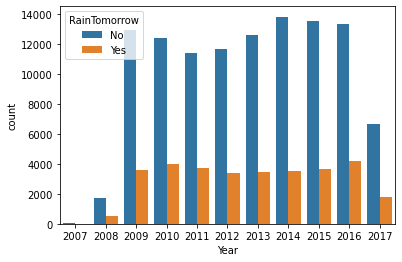

In [13]:
sns.countplot(x='Year',hue='RainTomorrow',data=data)

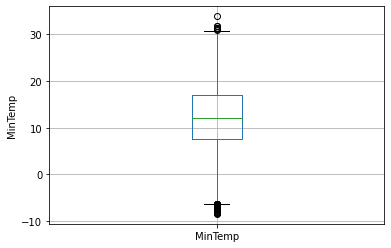

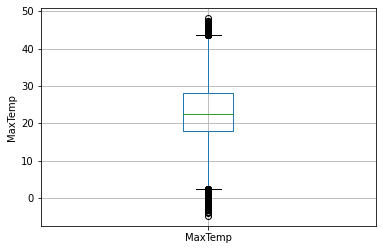

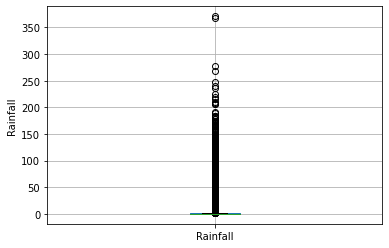

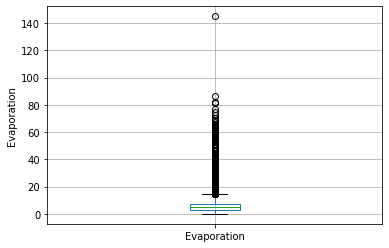

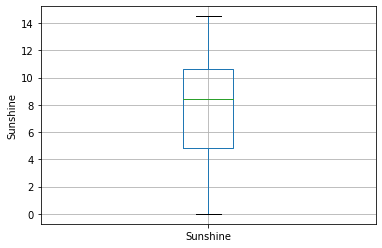

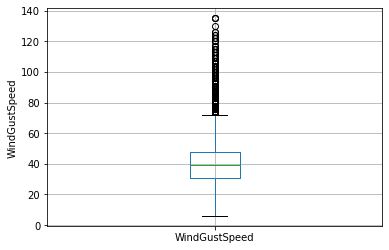

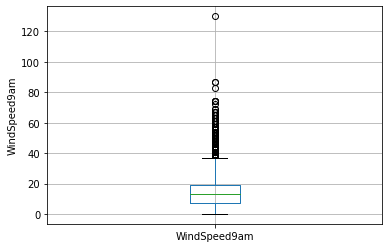

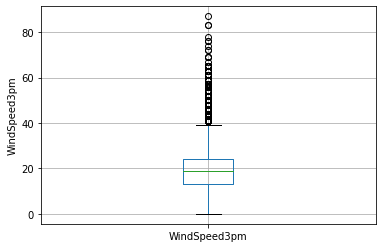

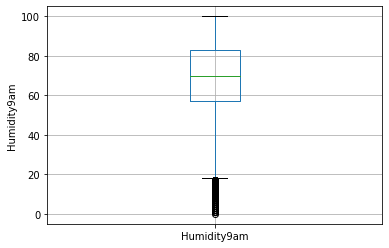

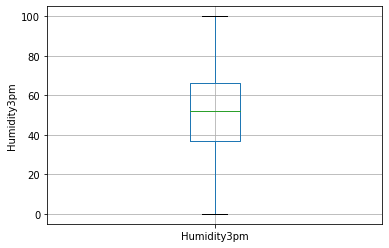

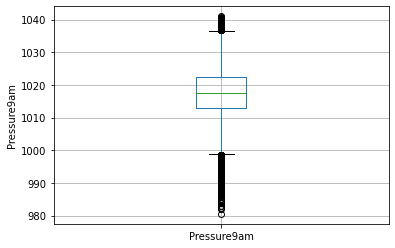

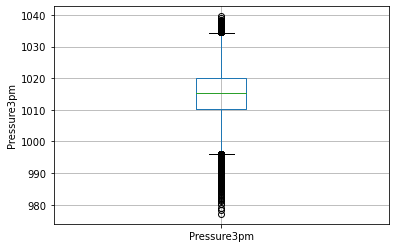

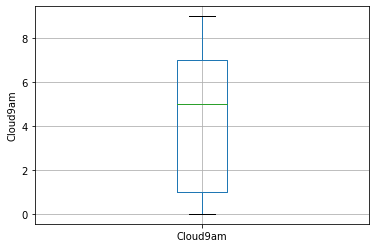

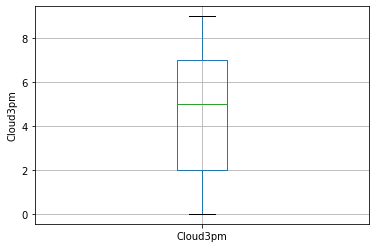

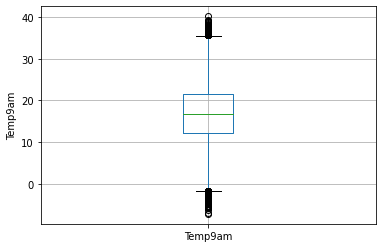

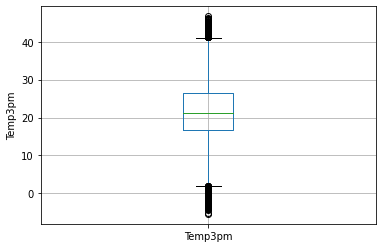

In [14]:
##continuous features
for feature in continuous_feature:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

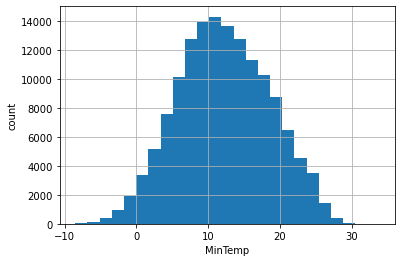

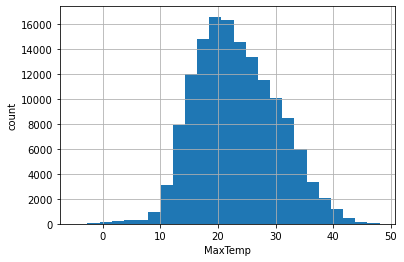

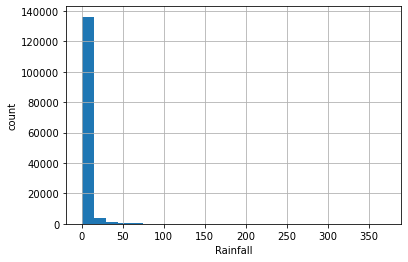

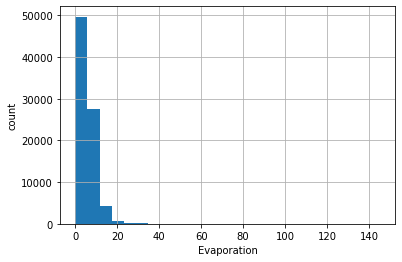

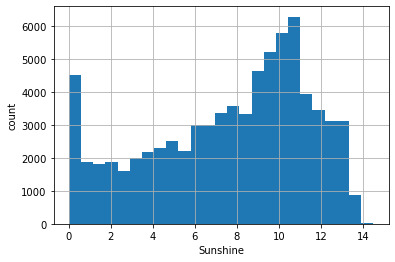

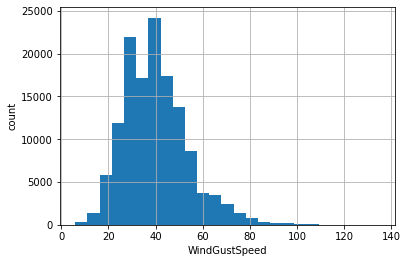

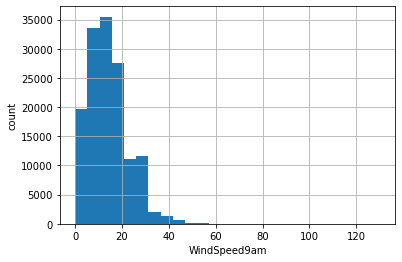

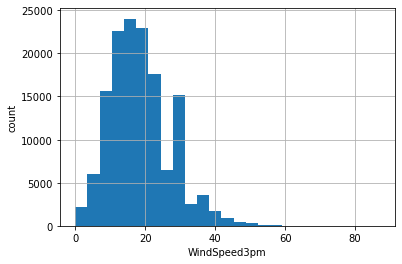

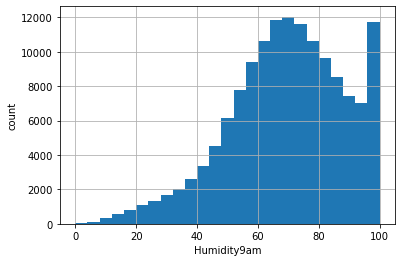

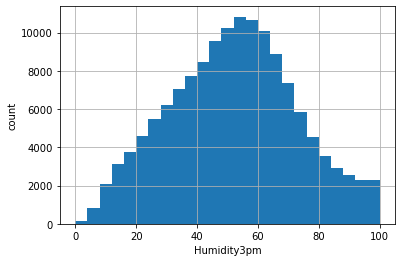

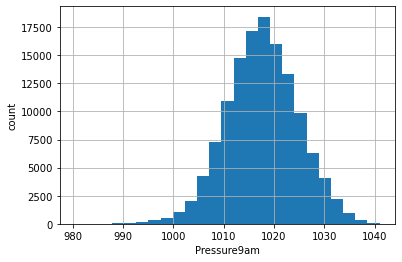

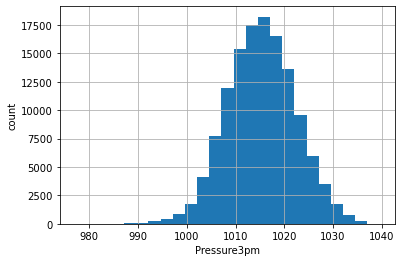

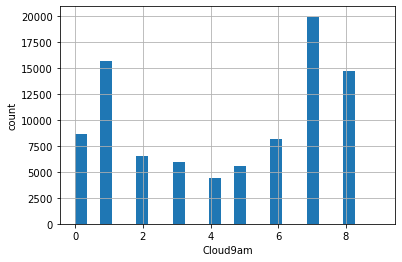

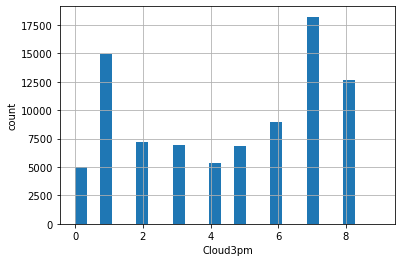

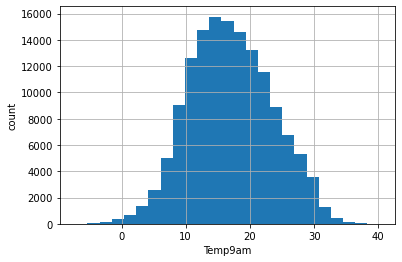

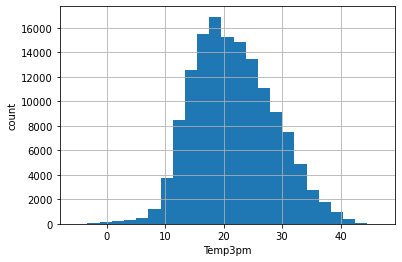

In [15]:
for feature in continuous_feature:
    data=df.copy()

    data[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('count')
    #here plt.show() is displaying the graph
    plt.show()

In [16]:
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature and feature not in ['Date']]
categorical_feature

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

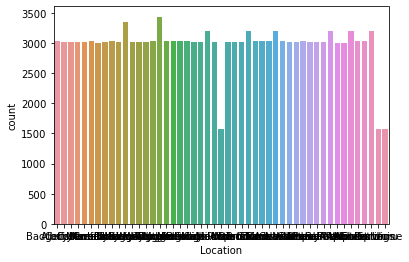

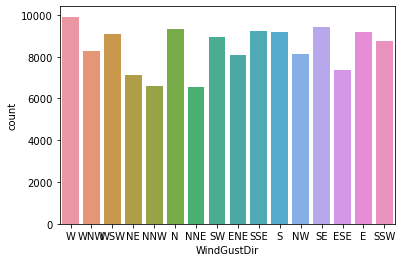

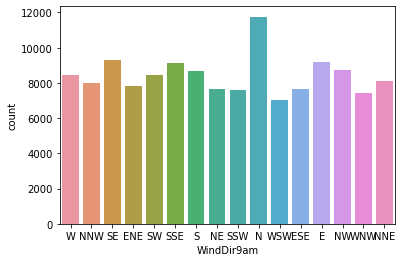

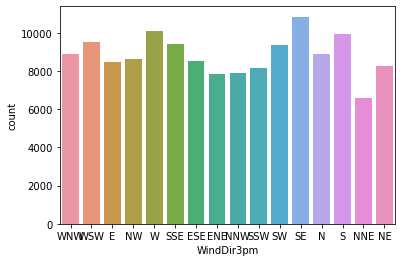

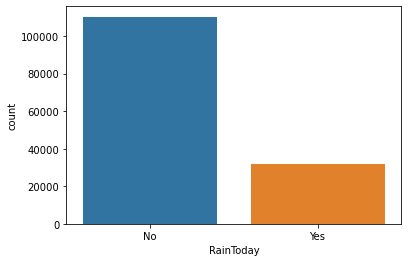

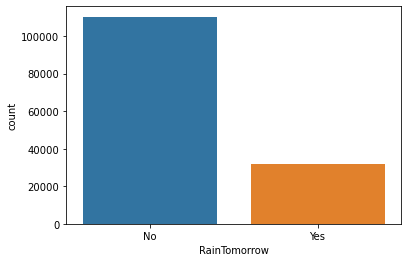

In [17]:
for feature in categorical_feature:
    sns.countplot(x=feature,data=df)
    plt.show()

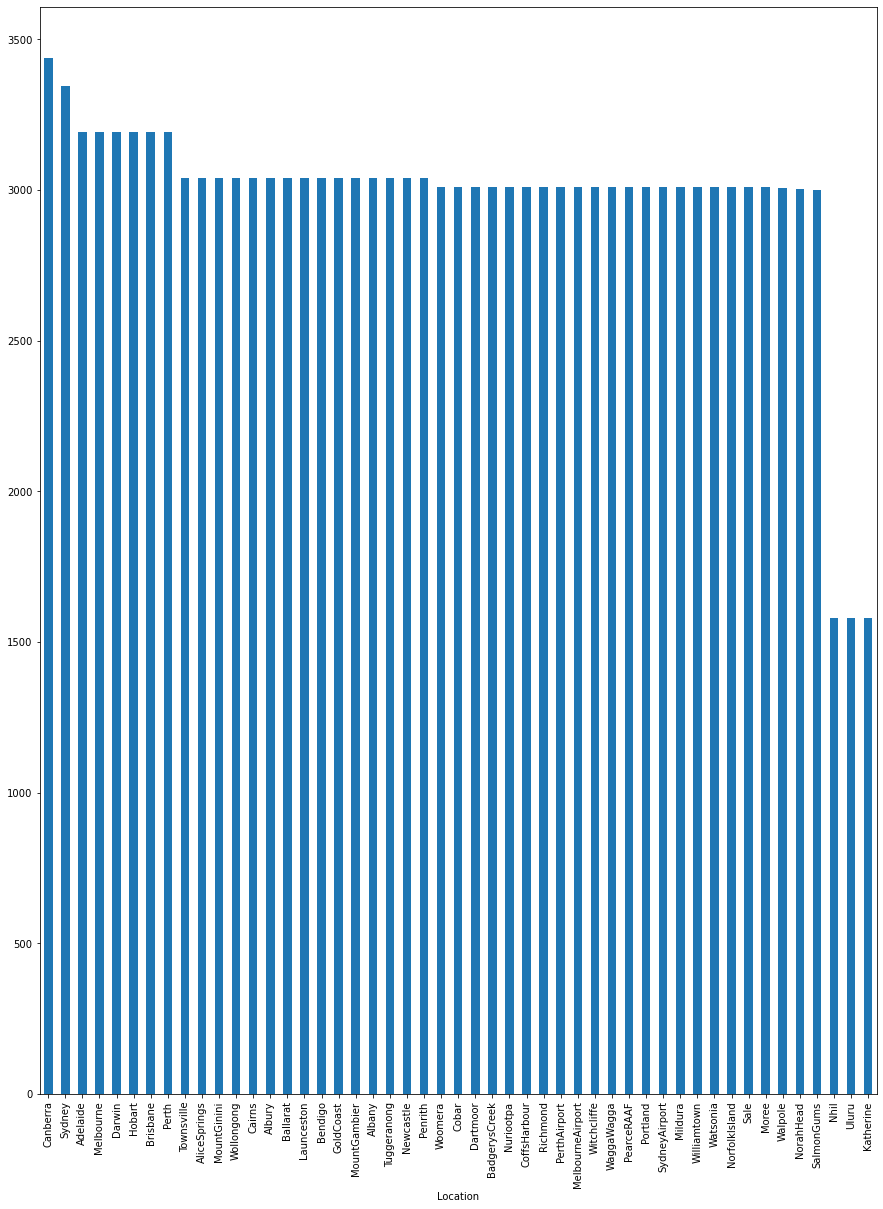

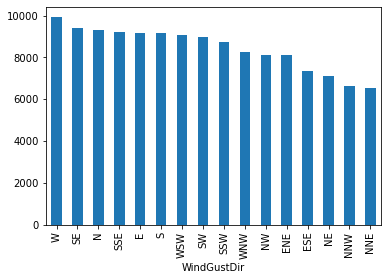

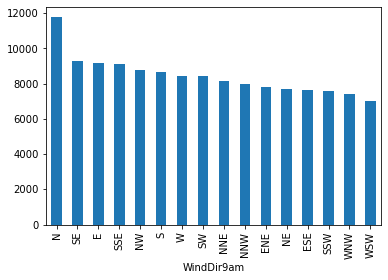

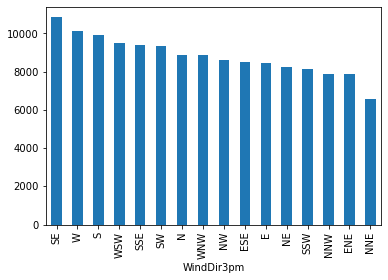

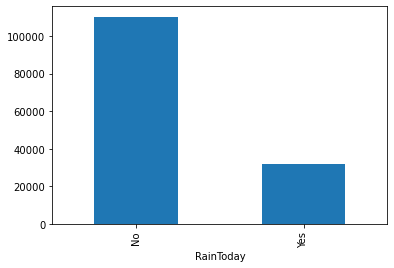

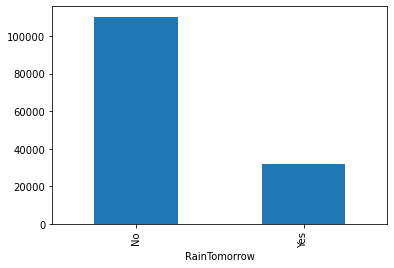

In [18]:
plt.figure(figsize=(15,20))
for feature in categorical_feature:
    df[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.show()

In [19]:
df1=data.groupby('Location')['RainTomorrow'].value_counts().sort_values(ascending=False).unstack()

In [20]:
df1=df1.reset_index()

In [21]:
##imbalanced dataset
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [22]:
total=110316+31877
No=(110316/total)*100
Yes=(31877/total)*100
print(No,Yes)

77.58187815152645 22.418121848473554


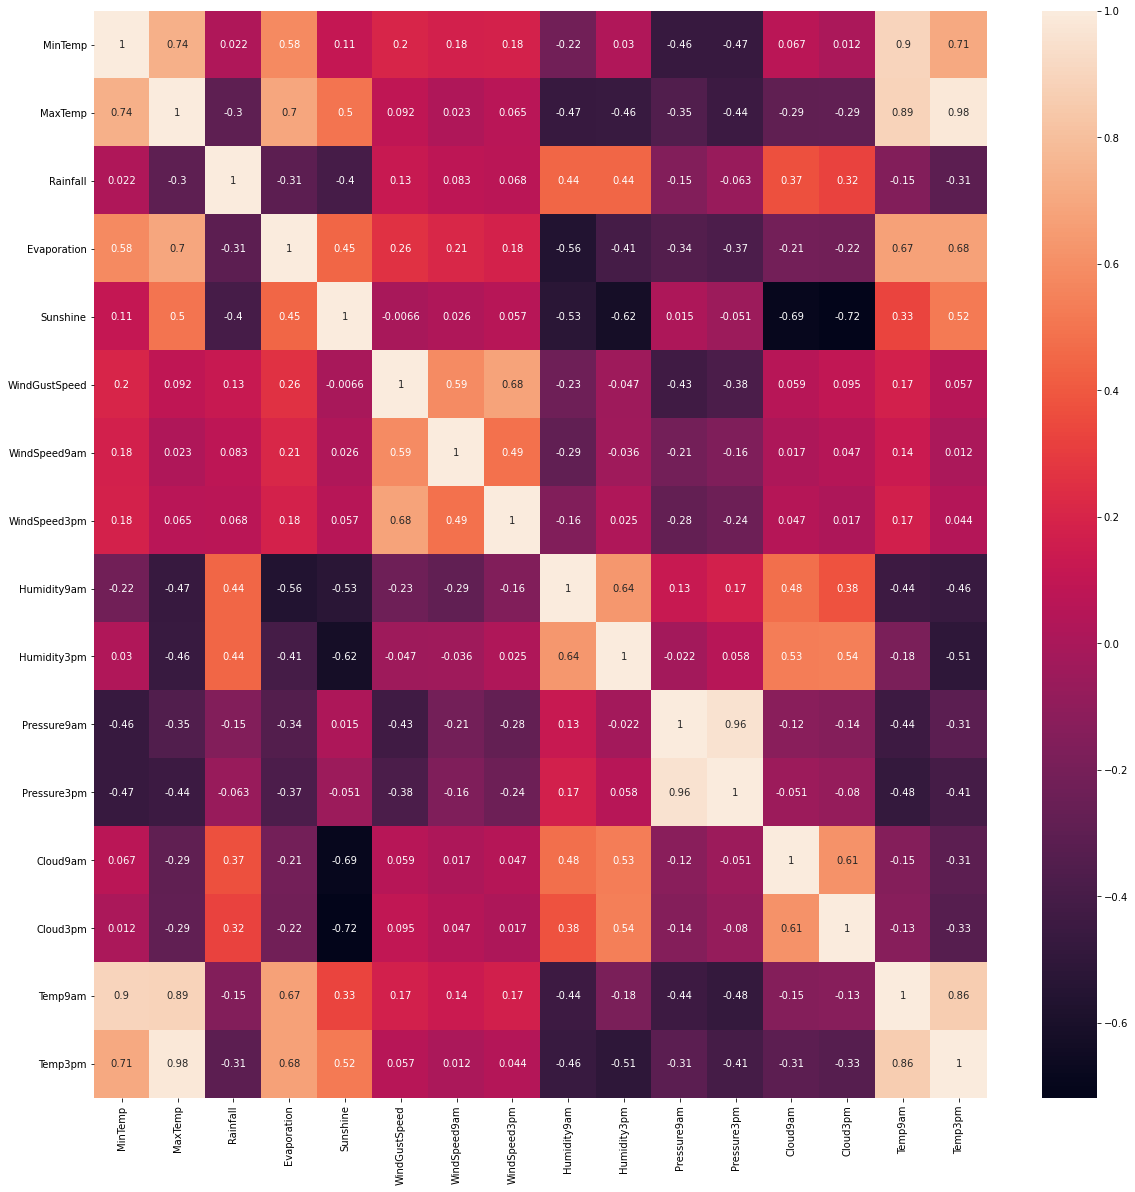

In [23]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

# Feature Engineering

In [24]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [25]:
def impute_nan(df,variable,median,mean):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_mean']=df[variable].fillna(mean)

In [26]:
#we took the random sample and then where there were null values we equal its index with
#random sample index and then we print the the null rows by loc and at those null values
#we equalled it with the random sample
#we did this because using fillna our changes were not coming in that particular column
def random_sample(df,variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [27]:
def impute_mode(data,variable):
    mode=data[variable].mode()[0]
    data[variable+'_mode']=data[variable].fillna(mode)

In [28]:
##discrete features
data=df.copy()
for feature in discrete_feature:
    median=df[feature].median()
    mean=df[feature].mean()
    impute_nan(data,feature,median,mean)

In [29]:
#for the clouds and evaporation and sunshine there were having high correlation with other
#features so that is why we imputed those with the random_sample imputation
for feature in discrete_feature:
    random_sample(df, feature)
random_sample(df,'Evaporation')
random_sample(df,'Sunshine')

In [30]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [31]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


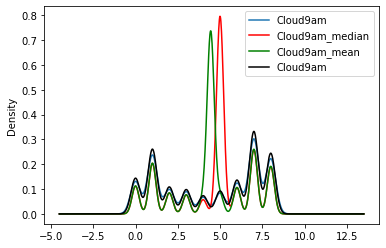

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
data1['Cloud9am'].plot(kind='kde', ax=ax)
data['Cloud9am_median'].plot(kind='kde', ax=ax, color='red')
data['Cloud9am_mean'].plot(kind='kde', ax=ax, color='green')
df['Cloud9am'].plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [33]:
##continuous features
#the other continuous features were not highly correlated so we imputed them with median
lst=['Cloud9am','Cloud3pm','Evaporation','Sunshine']
for feature in continuous_feature:
    if feature in lst:
        pass
    else:
        df[feature].fillna(df[feature].median(), inplace=True)

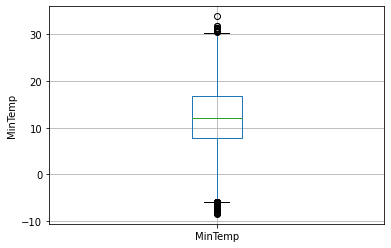

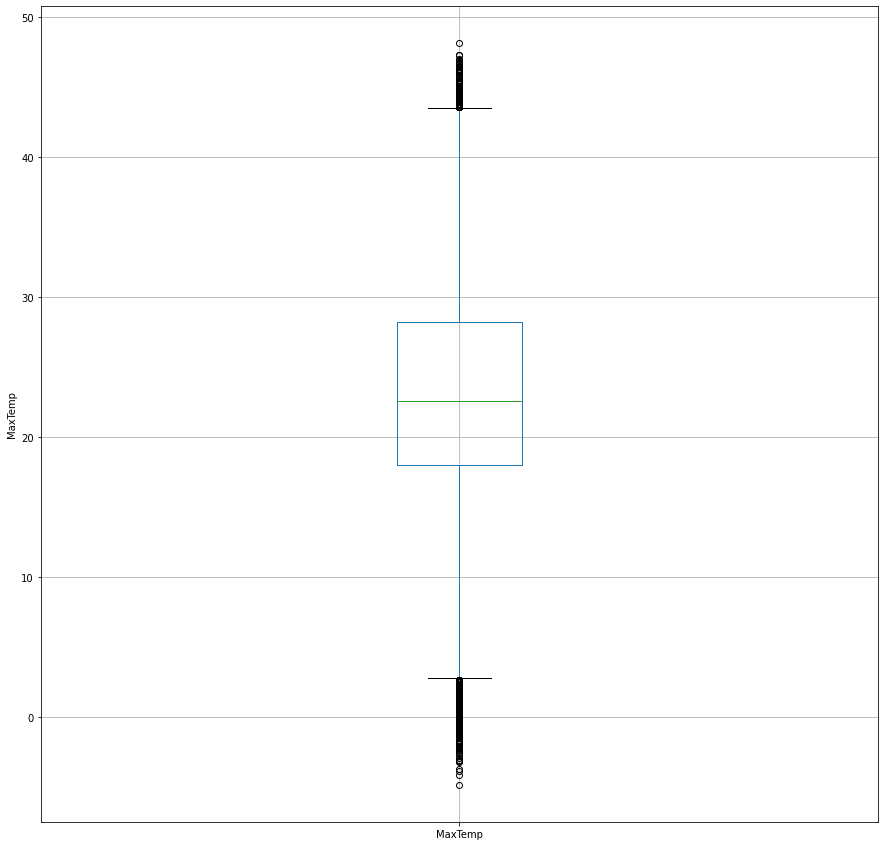

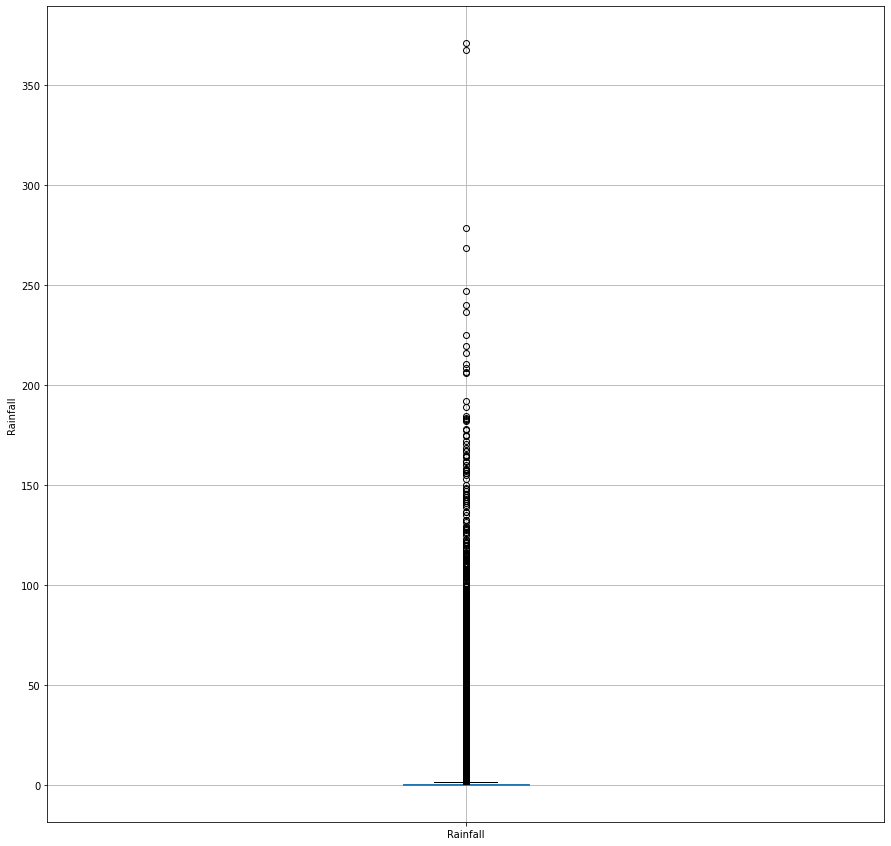

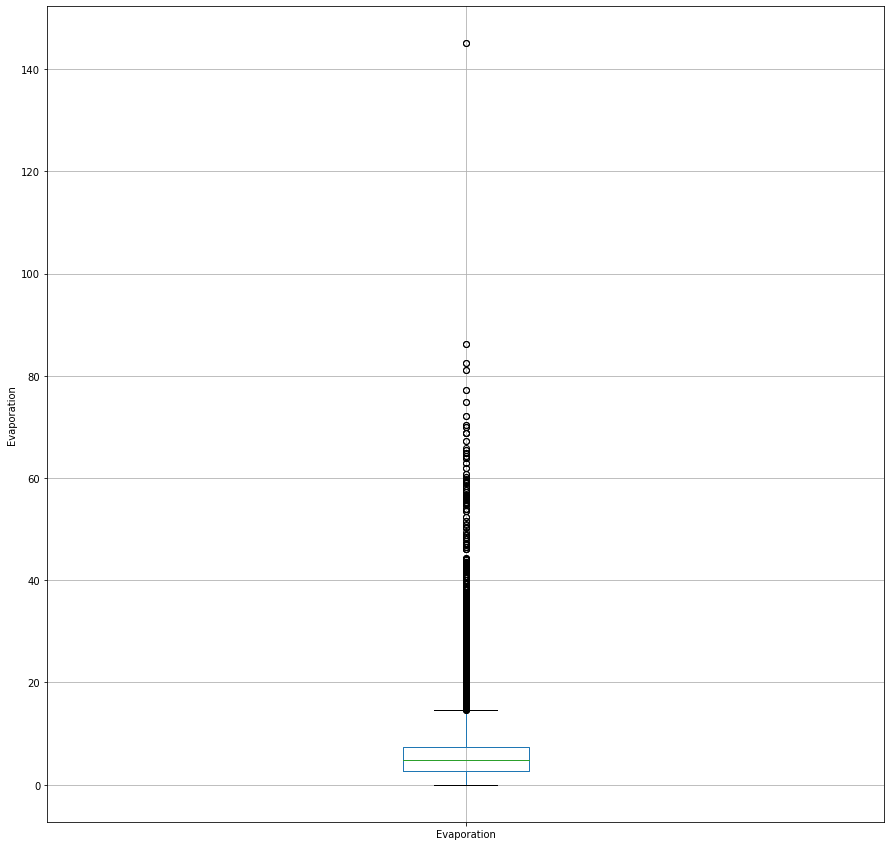

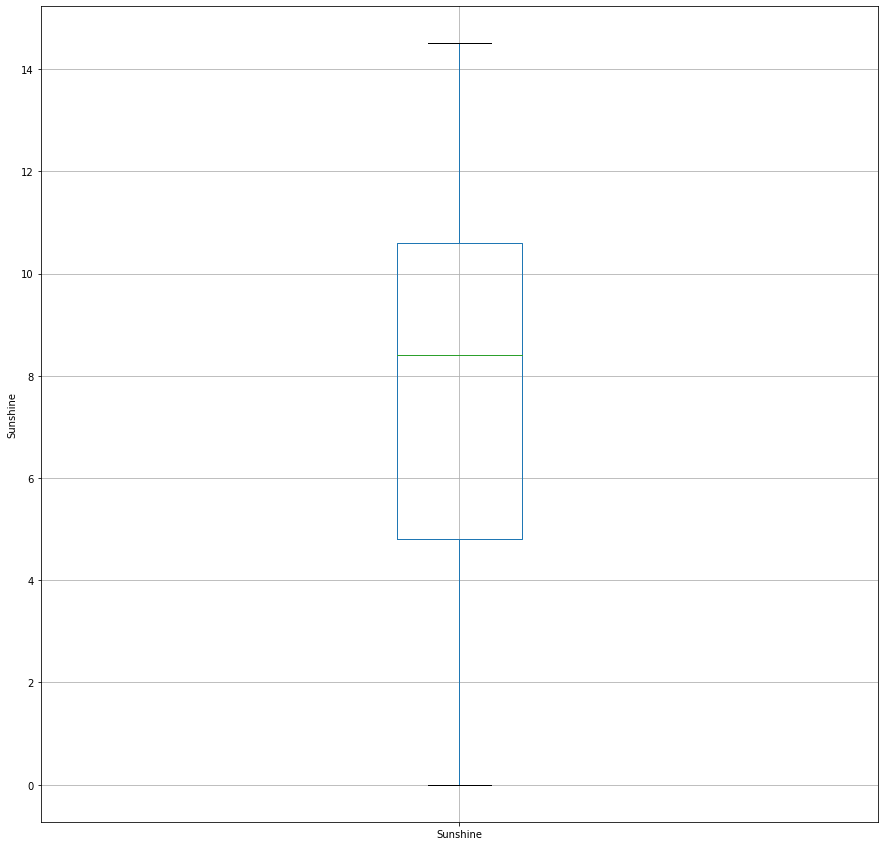

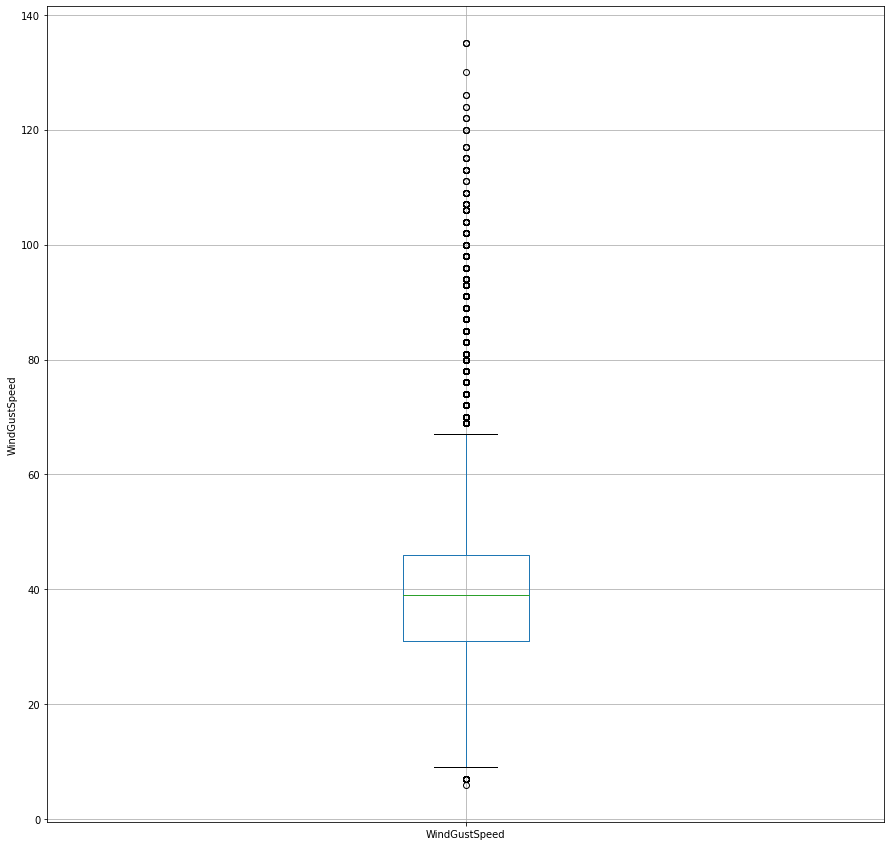

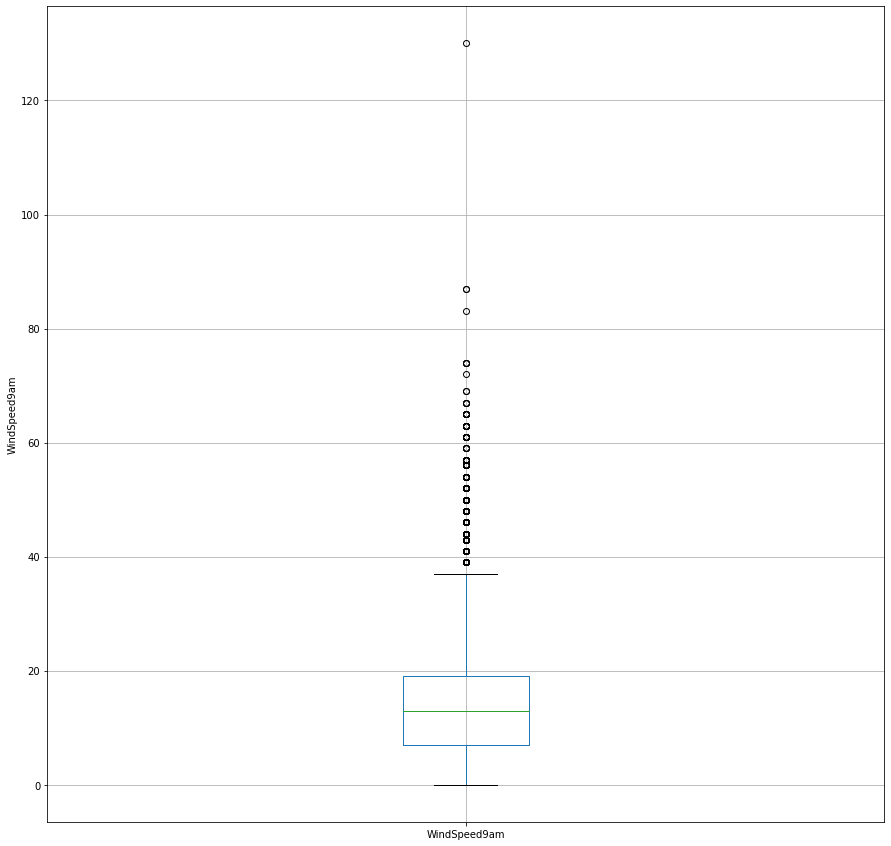

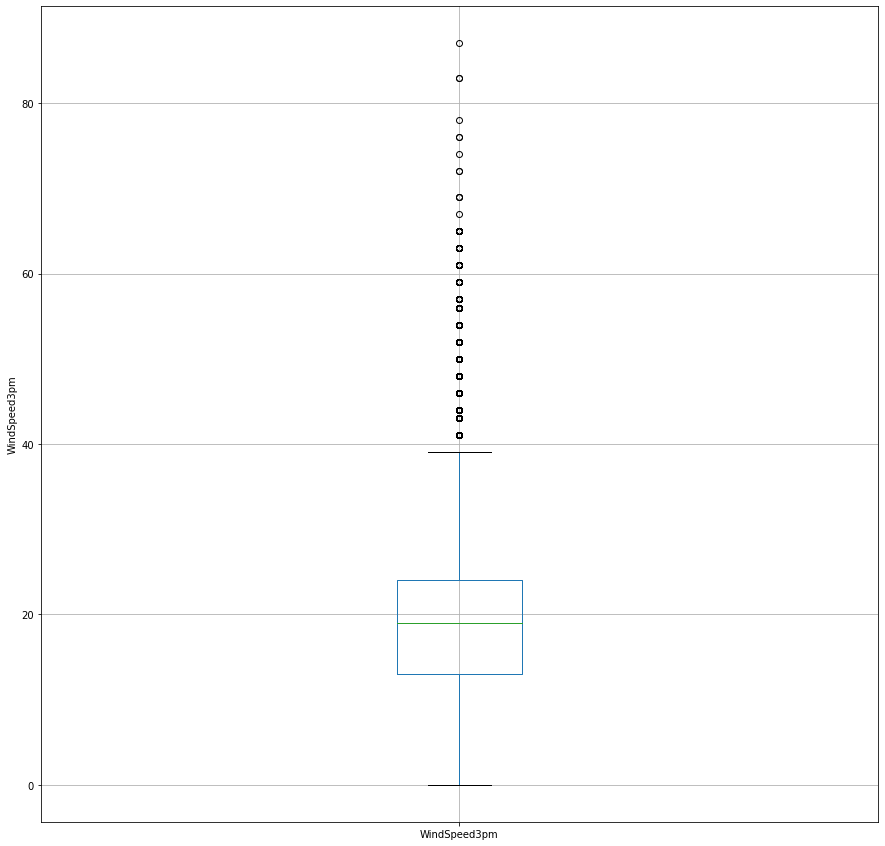

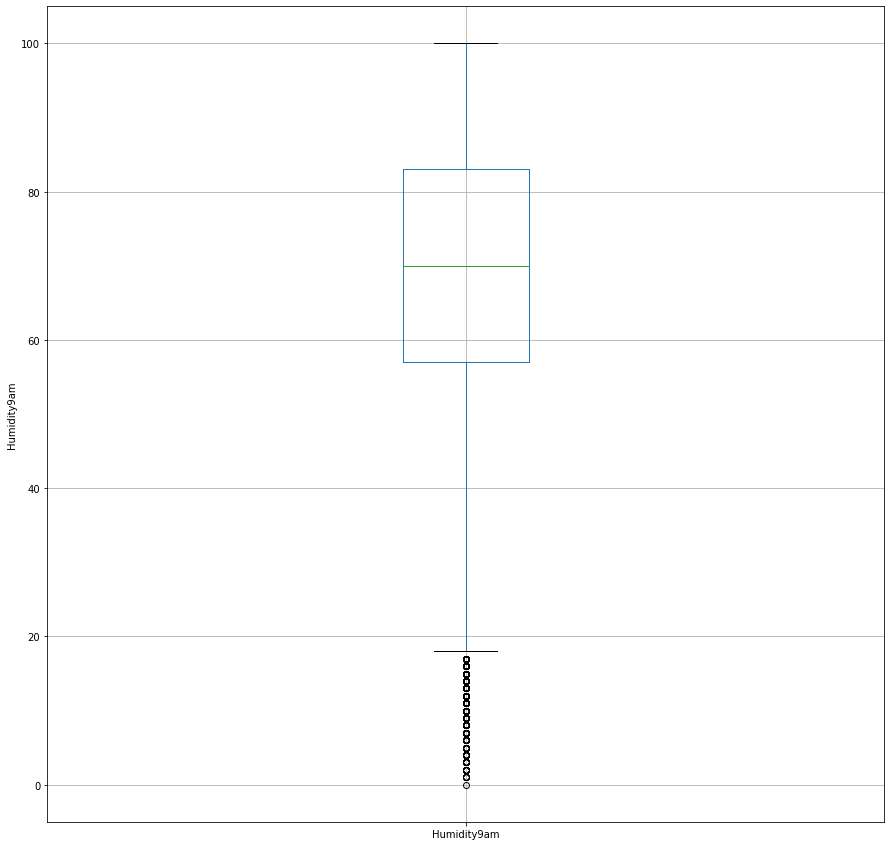

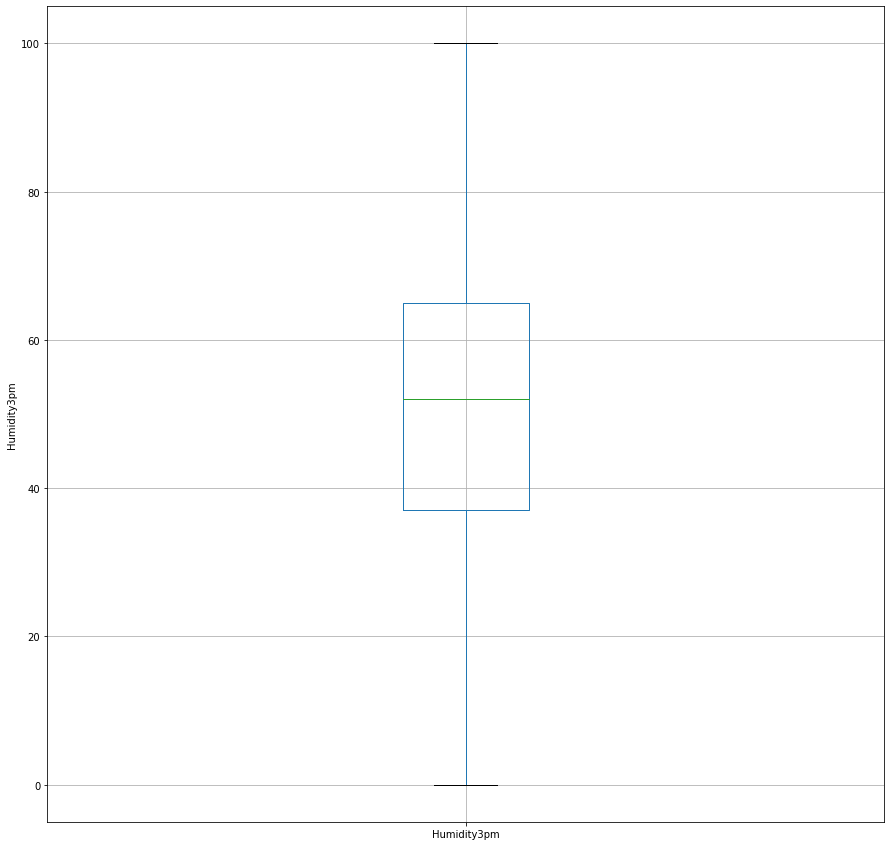

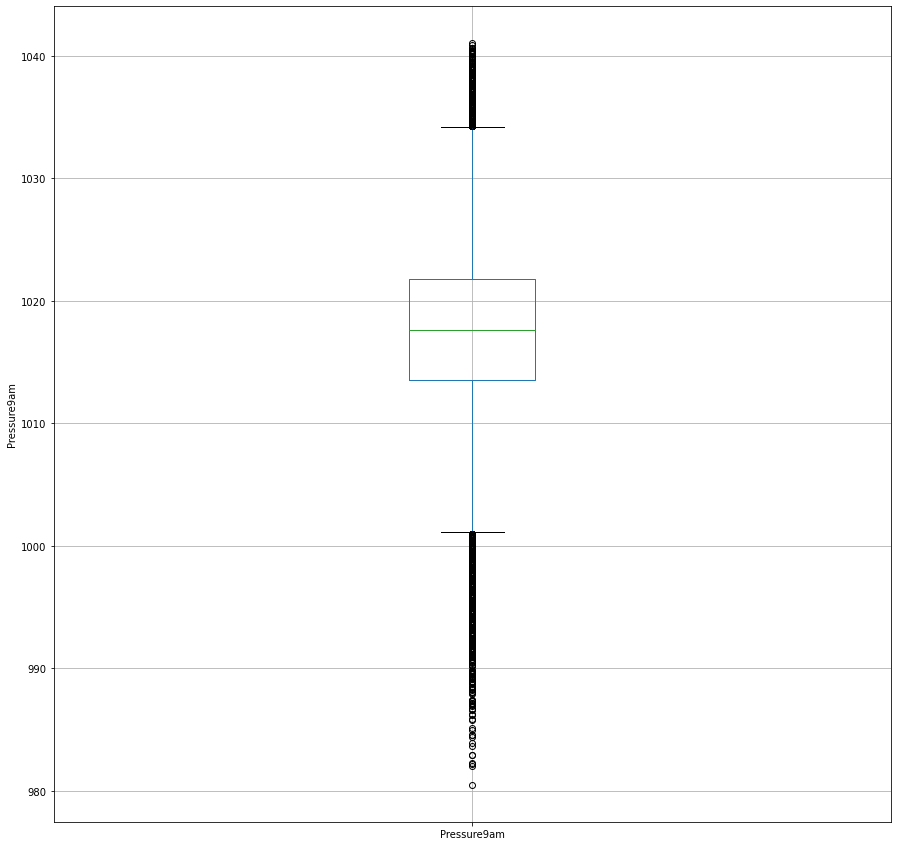

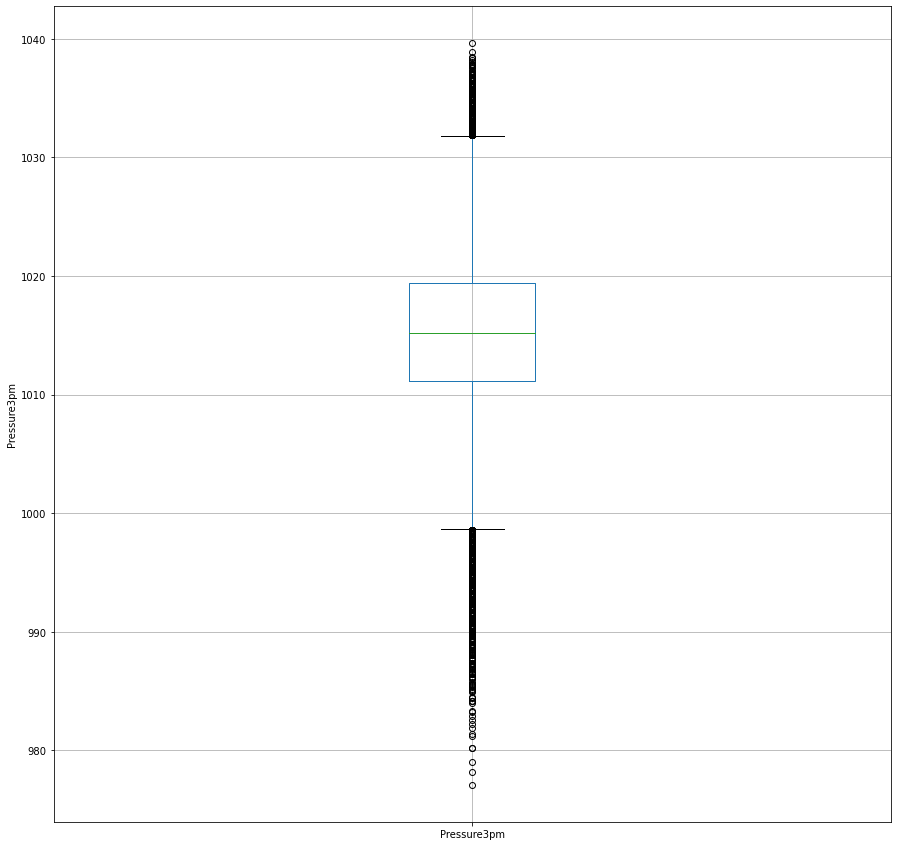

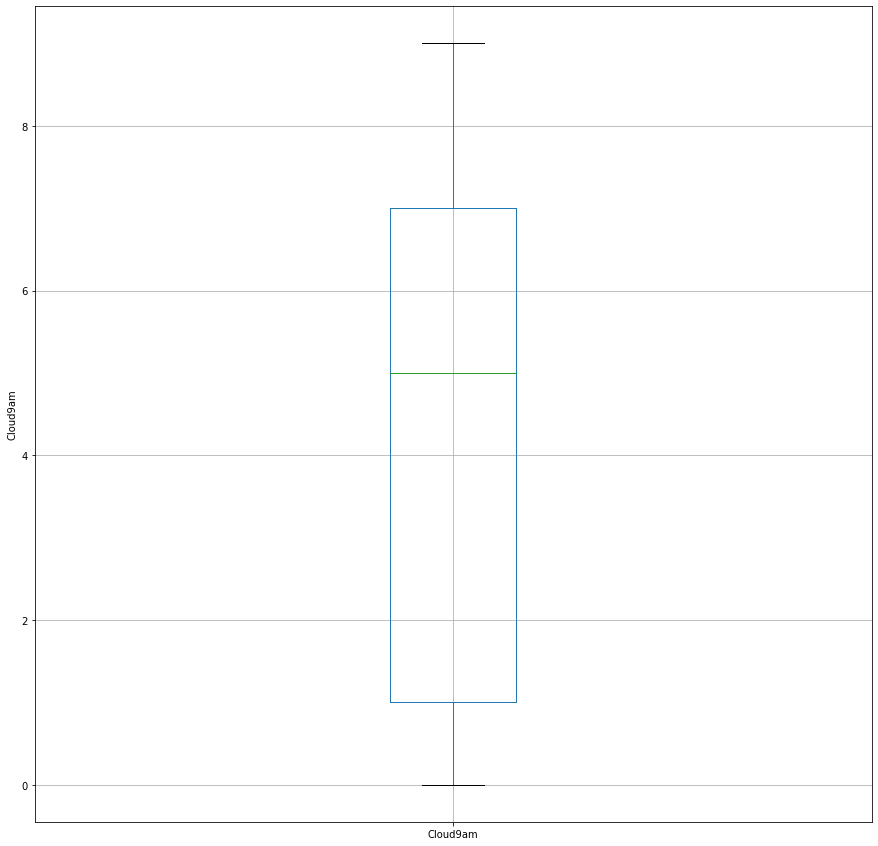

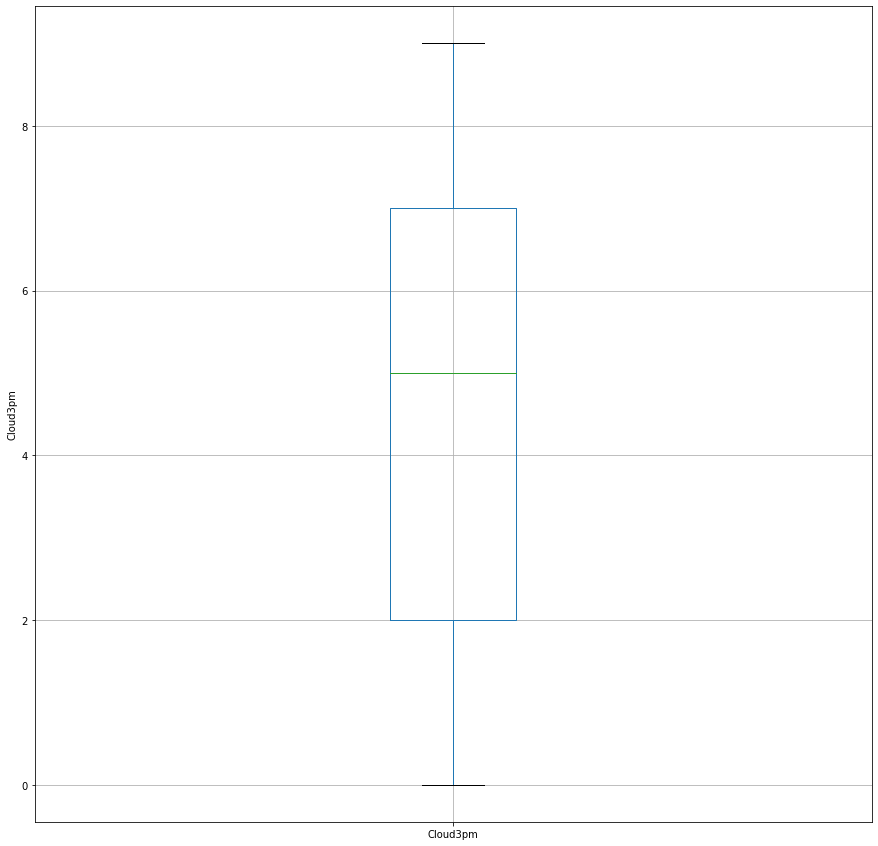

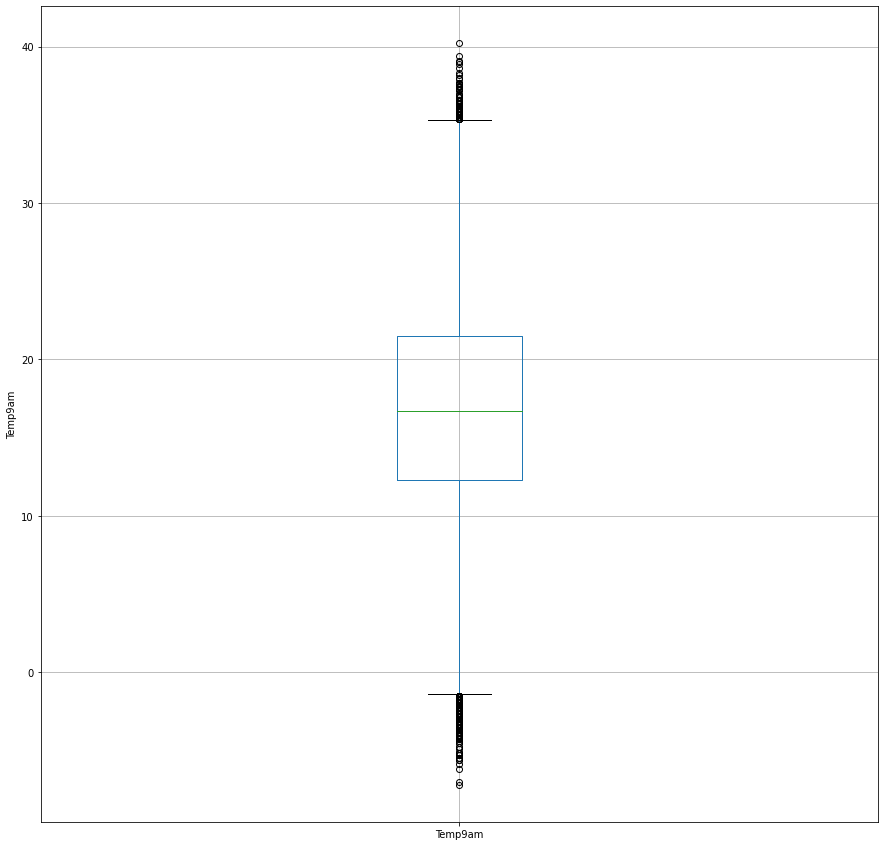

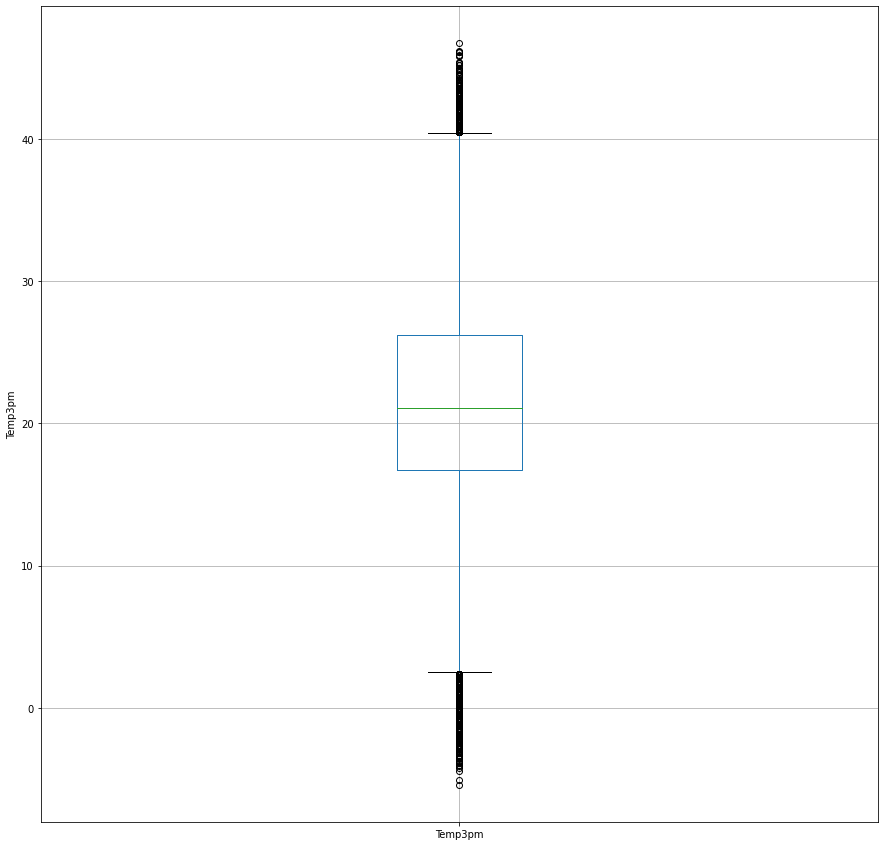

<Figure size 1080x1080 with 0 Axes>

In [34]:
for feature in continuous_feature:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.figure(figsize=(15,15))

In [35]:
##outliers
#MinTemp
IQR=df['MinTemp'].quantile(0.75)-df['MinTemp'].quantile(0.25)
lower_bridge=df['MinTemp'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['MinTemp'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [36]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [37]:
#MaxTemp
IQR=df['MaxTemp'].quantile(0.75)-df['MaxTemp'].quantile(0.25)
lower_bridge=df['MaxTemp'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['MaxTemp'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [38]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [39]:
#Rainfall
IQR=df['Rainfall'].quantile(0.75)-df['Rainfall'].quantile(0.25)
lower_bridge=df['Rainfall'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Rainfall'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [40]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [41]:
#Evaporation
IQR=df['Evaporation'].quantile(0.75)-df['Evaporation'].quantile(0.25)
lower_bridge=df['Evaporation'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Evaporation'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [42]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [43]:
#Sunshine
#IQR=df['Sunshine'].quantile(0.75)-df['Sunshine'].quantile(0.25)
#lower_bridge=df['Sunshine'].quantile(0.25)-(IQR*1.5)
#upper_bridge=df['Sunshine'].quantile(0.75)+(IQR*1.5)
#print(lower_bridge, upper_bridge)

In [44]:
#df.loc[df['Sunshine']>=7.0,'Sunshine']=7.0
#df.loc[df['Sunshine']<=2.19,'Sunshine']=2.19

In [45]:
#WindGustSpeed
IQR=df['WindGustSpeed'].quantile(0.75)-df['WindGustSpeed'].quantile(0.25)
lower_bridge=df['WindGustSpeed'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['WindGustSpeed'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [46]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [47]:
#WindSpeed9am
IQR=df['WindSpeed9am'].quantile(0.75)-df['WindSpeed9am'].quantile(0.25)
lower_bridge=df['WindSpeed9am'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['WindSpeed9am'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [48]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [49]:
#WindSpeed3pm
IQR=df['WindSpeed3pm'].quantile(0.75)-df['WindSpeed3pm'].quantile(0.25)
lower_bridge=df['WindSpeed3pm'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['WindSpeed3pm'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [50]:
df.loc[df['WindSpeed3pm']>=40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [51]:
#Humidity9am
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [52]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [53]:
#Pressure9am
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [54]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [55]:
#Pressure3pm
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [56]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [57]:
#Temp9am
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [58]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [59]:
#Temp3pm
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [60]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

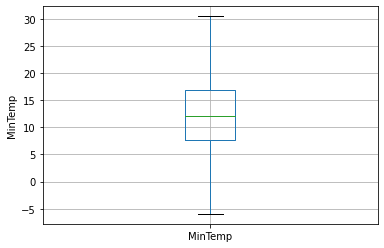

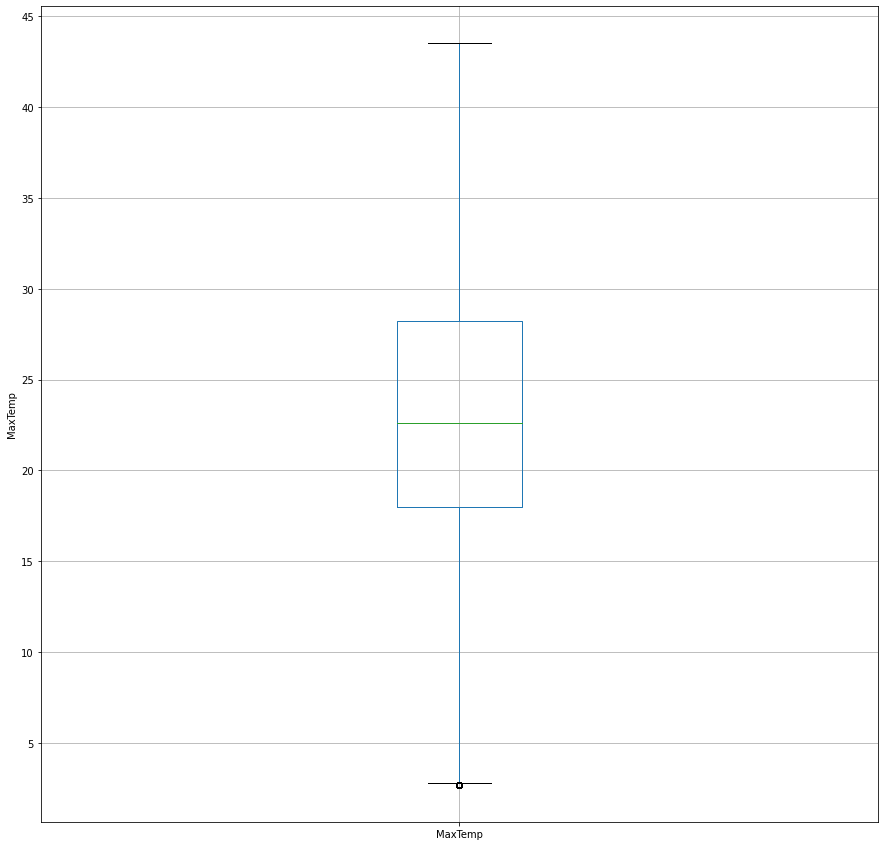

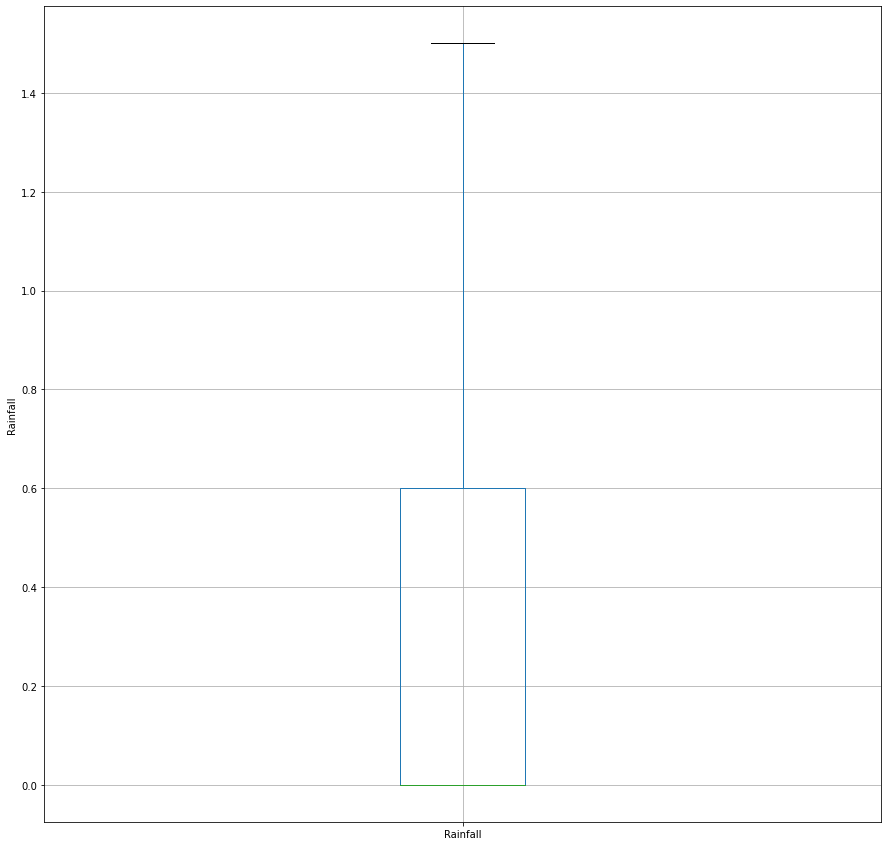

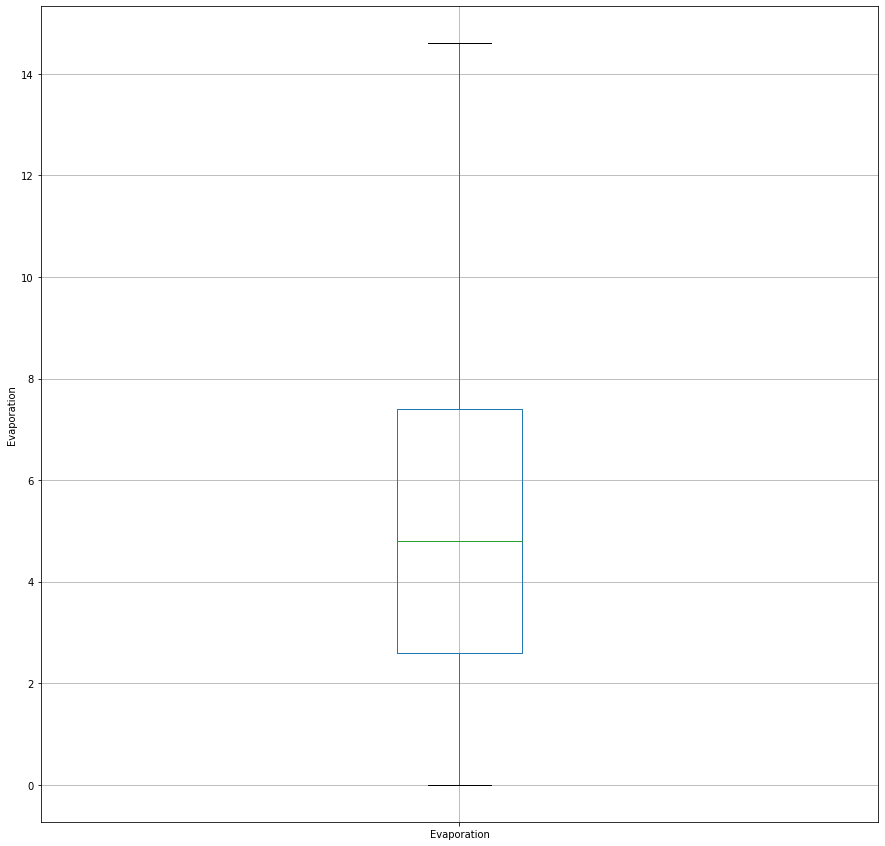

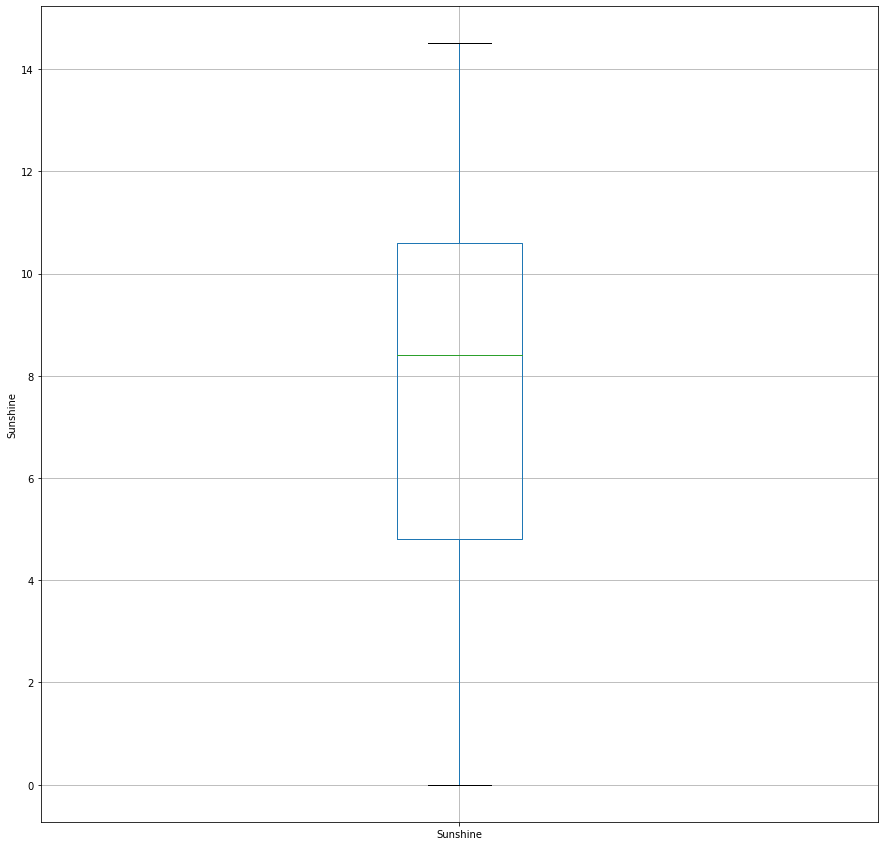

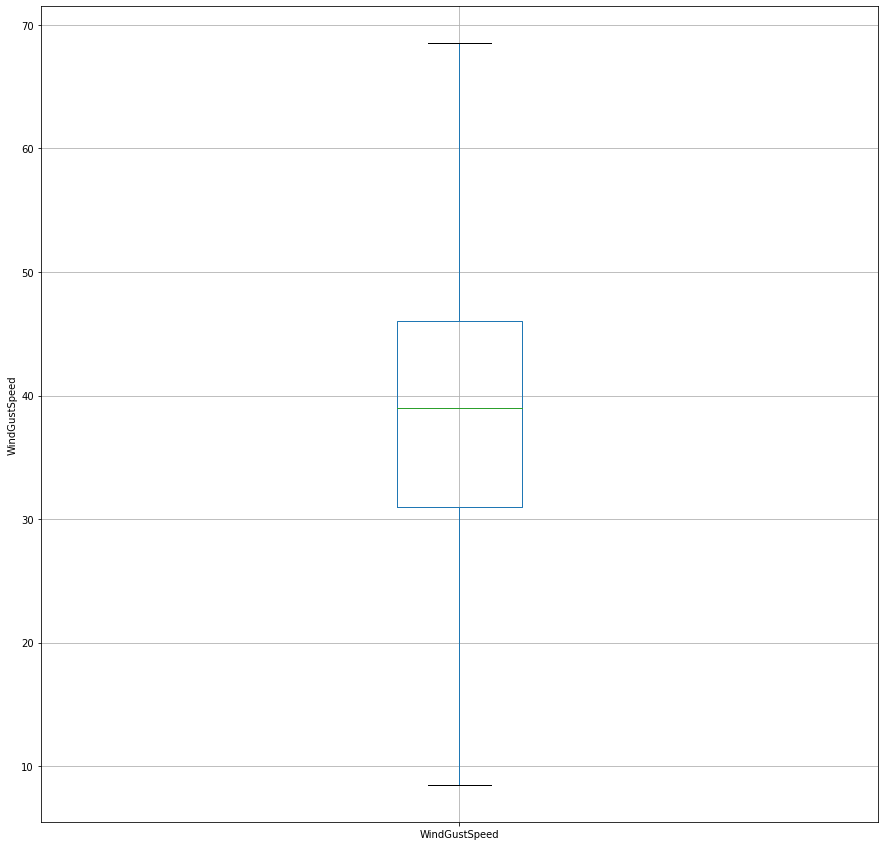

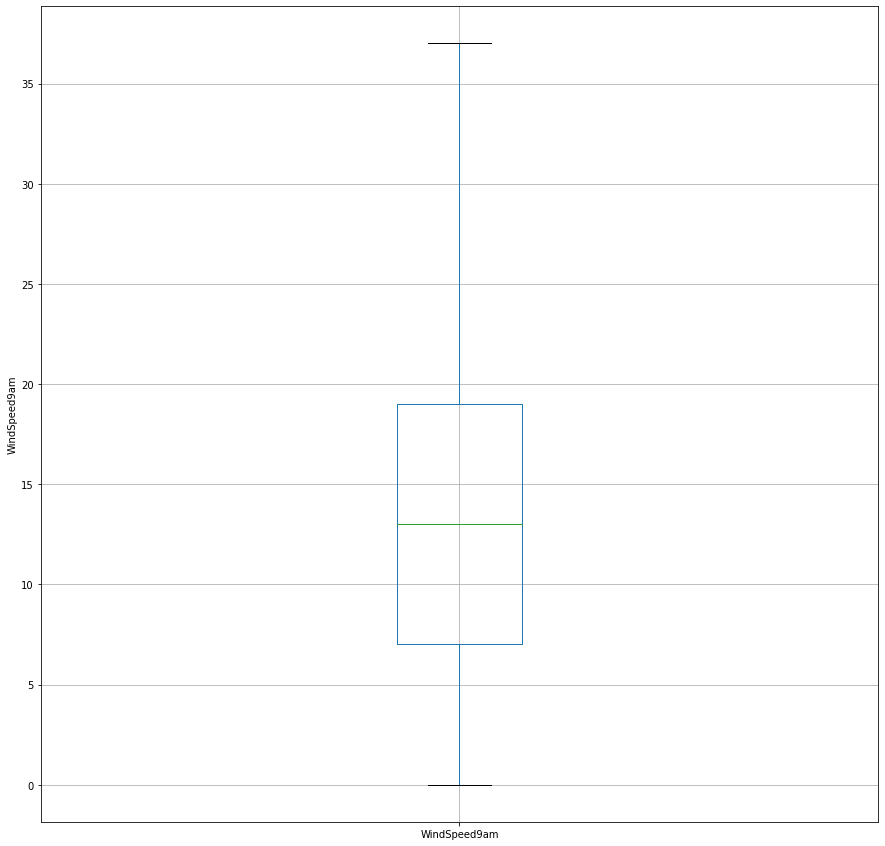

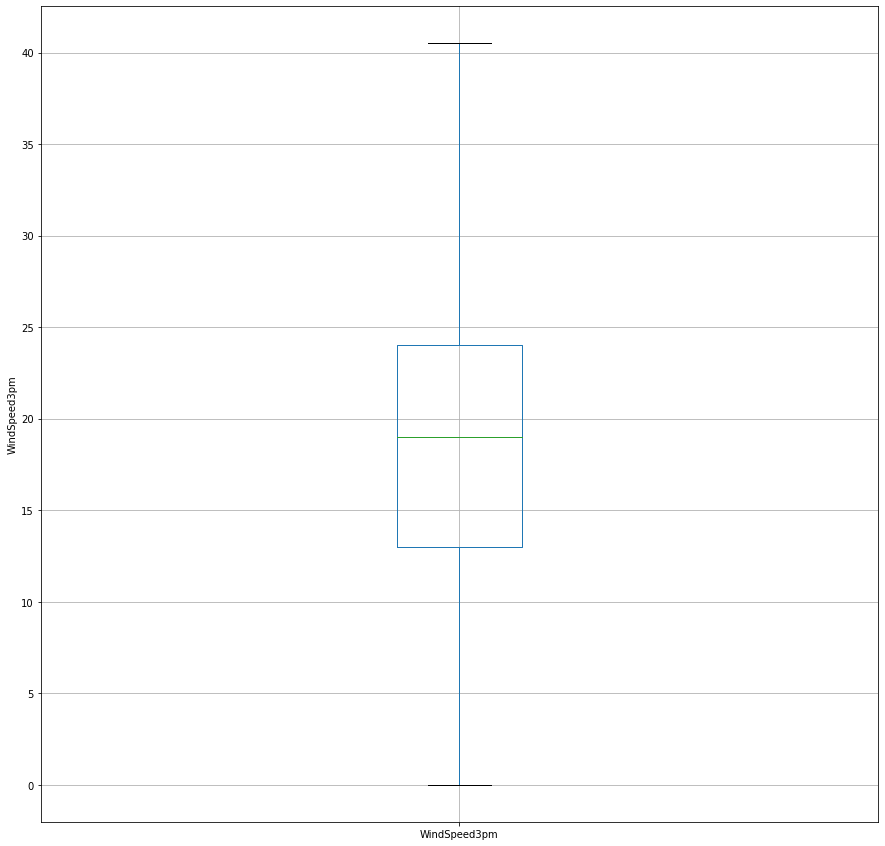

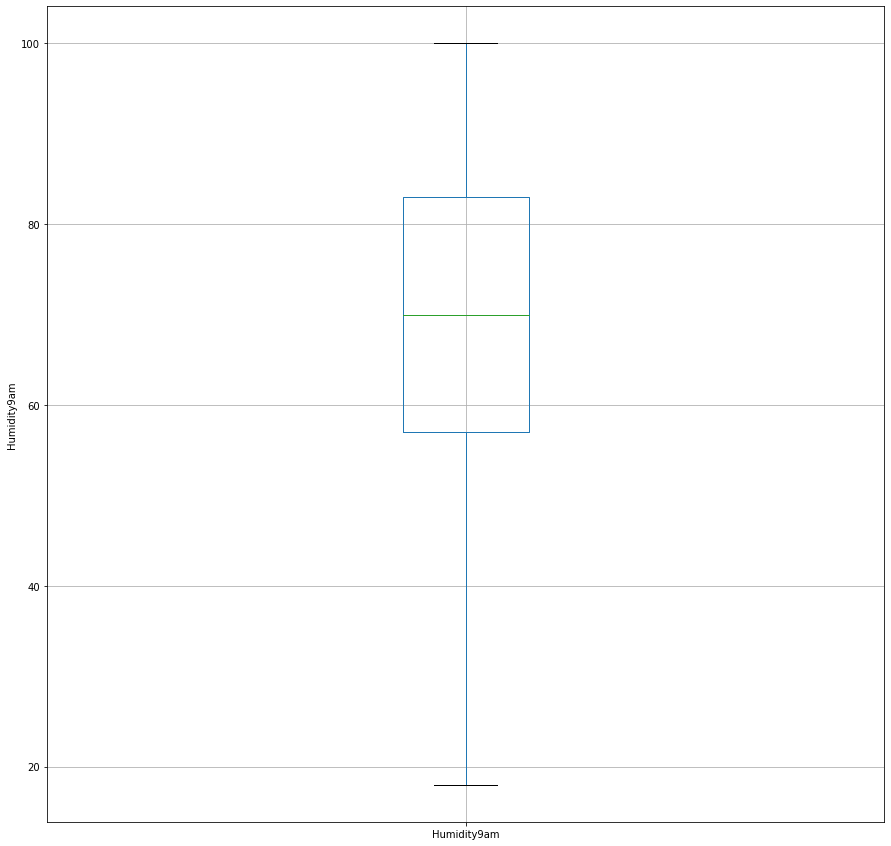

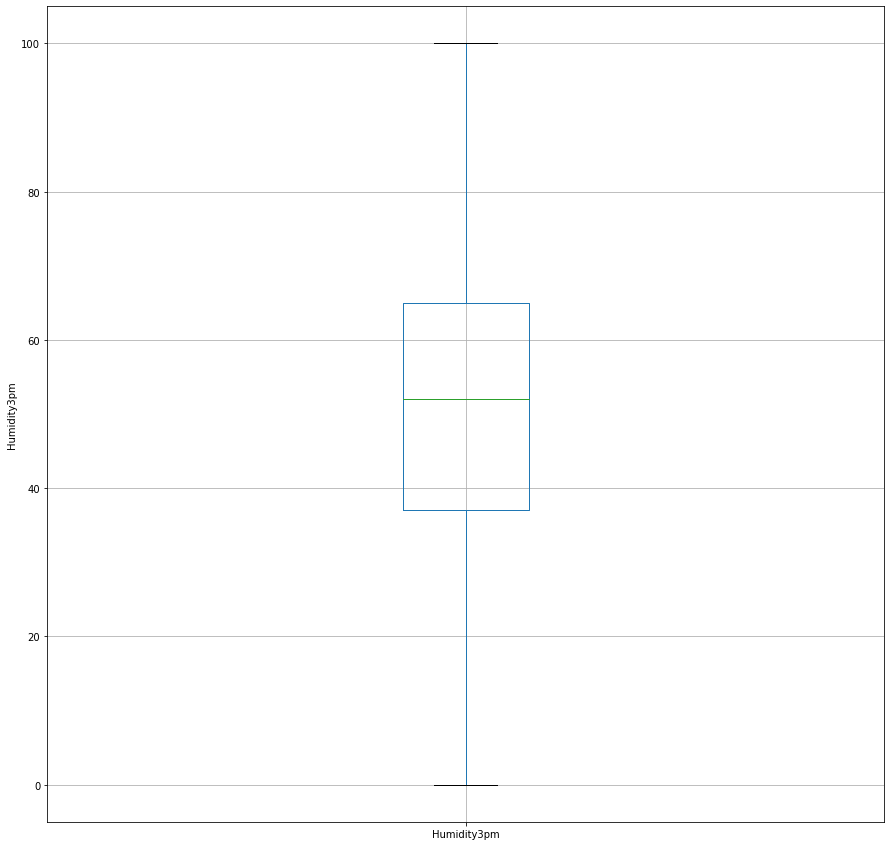

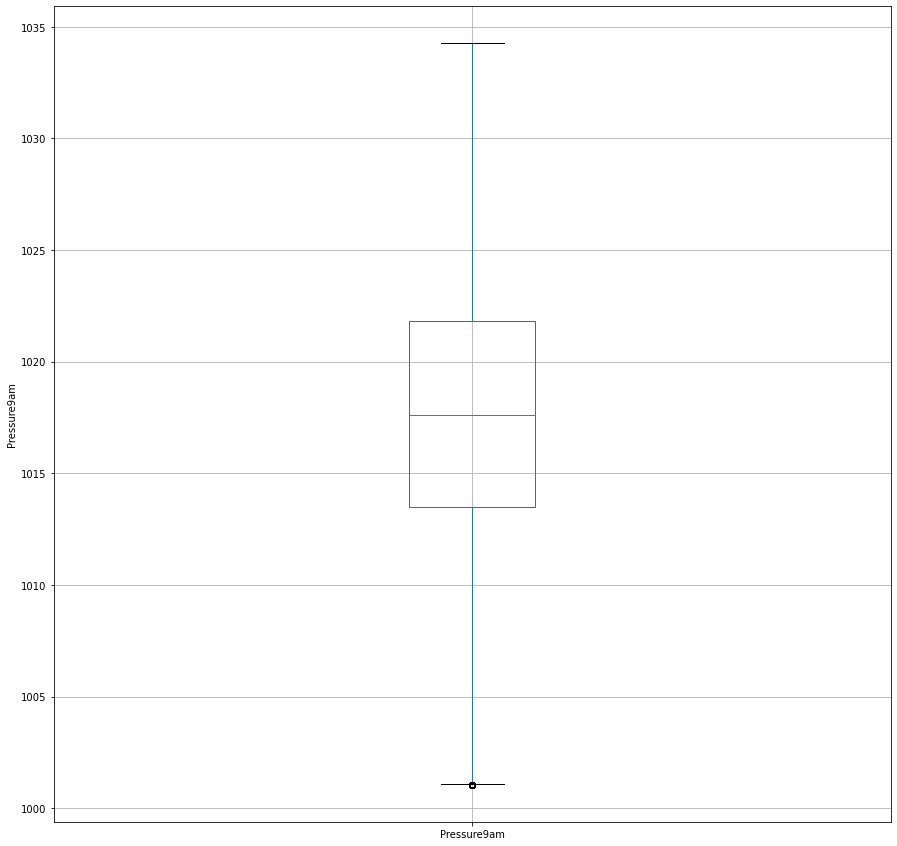

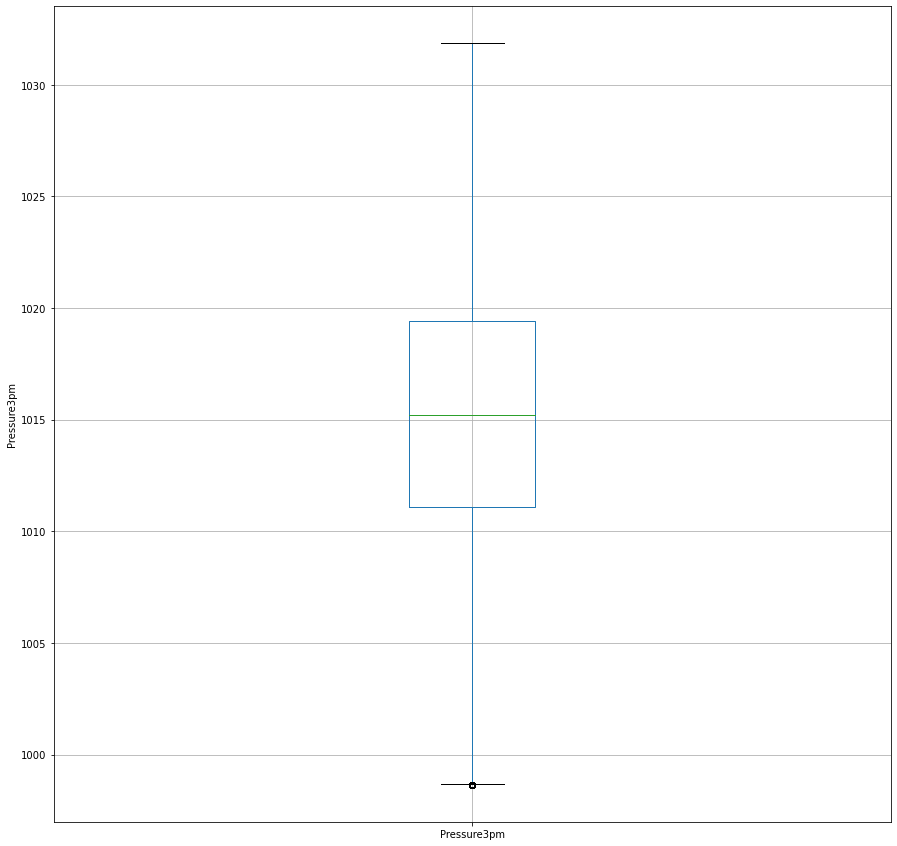

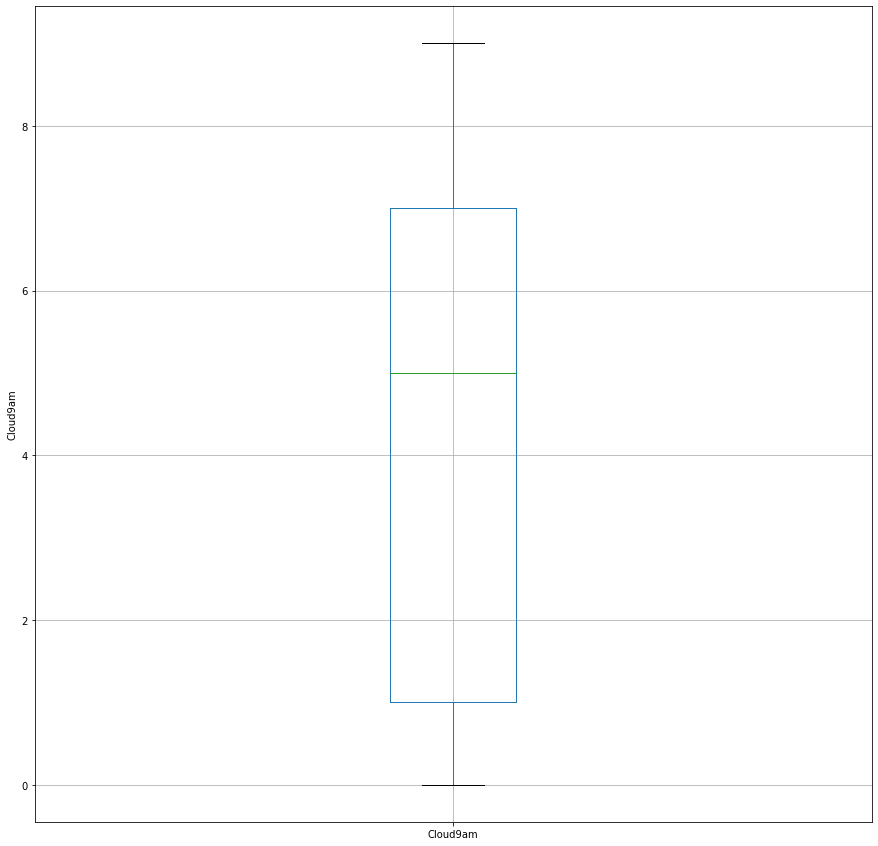

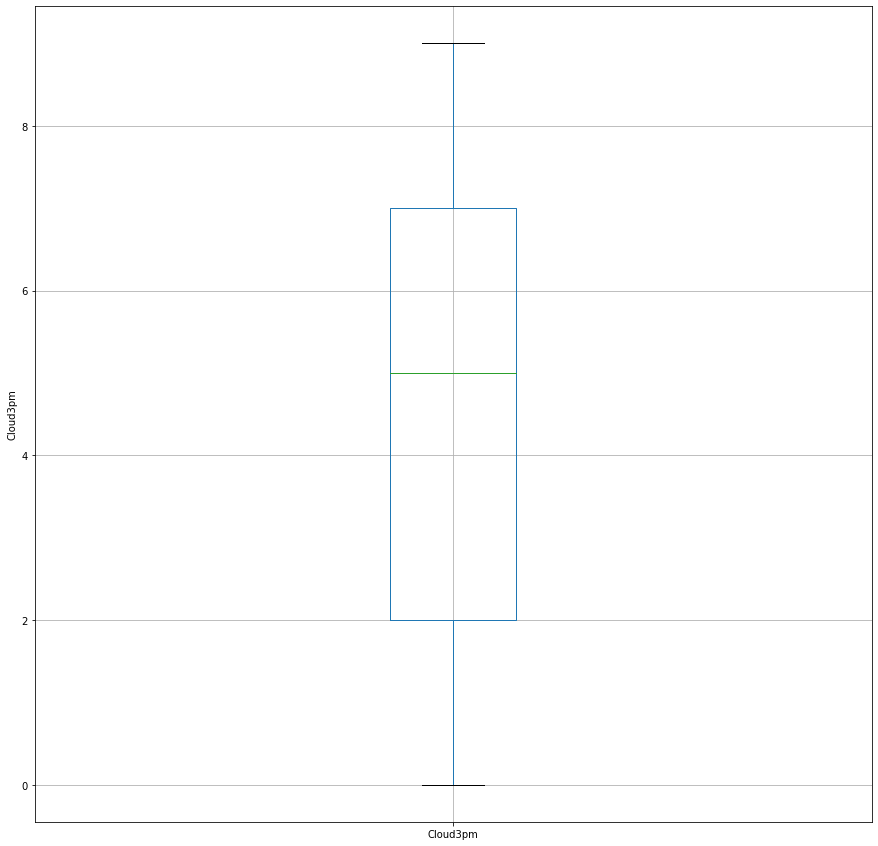

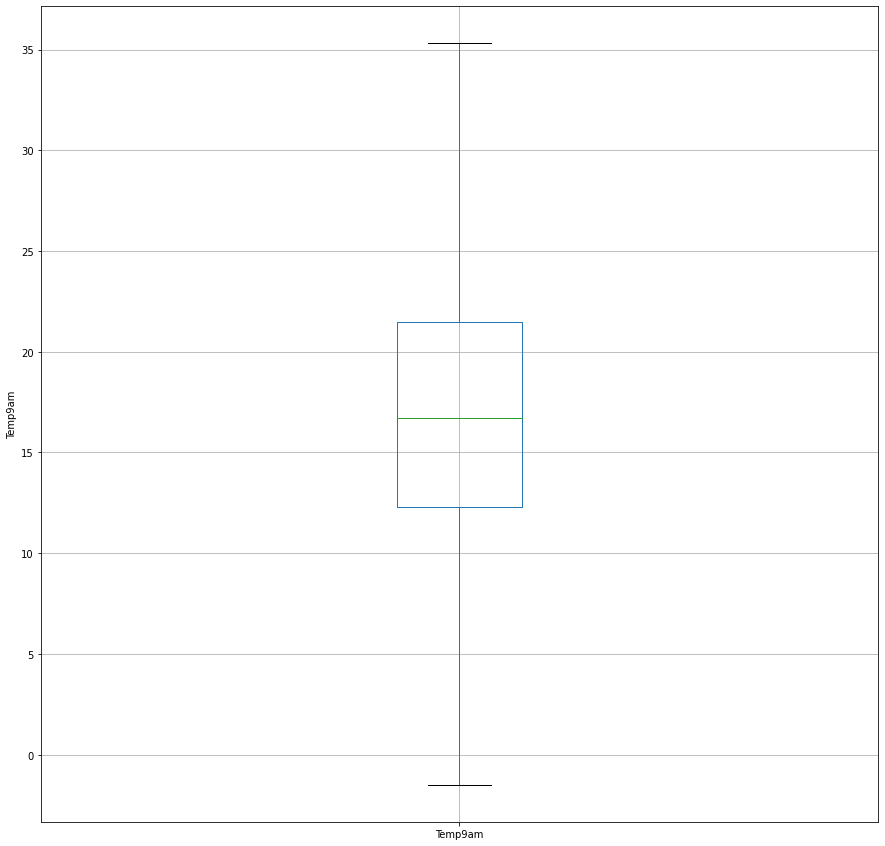

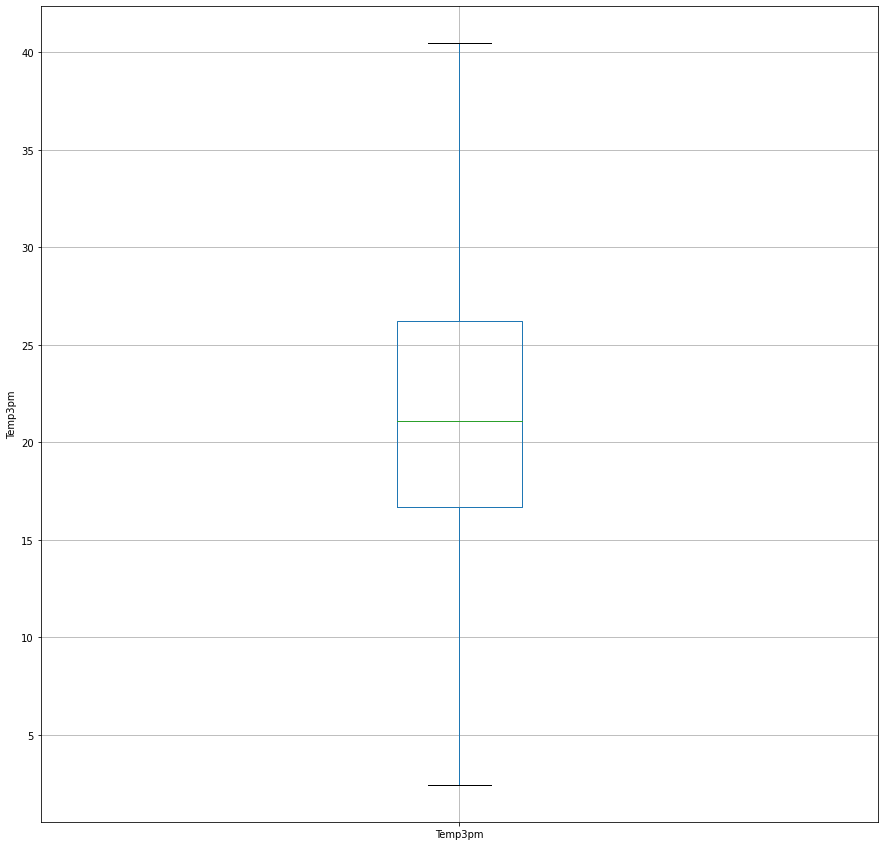

<Figure size 1080x1080 with 0 Axes>

In [61]:
for feature in continuous_feature:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.figure(figsize=(15,15))

In [62]:
import pylab
import scipy.stats as stat
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    #since subplot means 1 row, 2nd column and 1 index because there will be 2 plots
    plt.subplot(1,2,1)
    df[feature].hist()
    #since subplot means 1 row, 2nd column and 2 index
    plt.subplot(1,2,2)
    #Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution
    #dist='norm means normal distribution, plot=pylab means pylab use kro becz of math calculation'
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.xlabel(feature)
    plt.show()

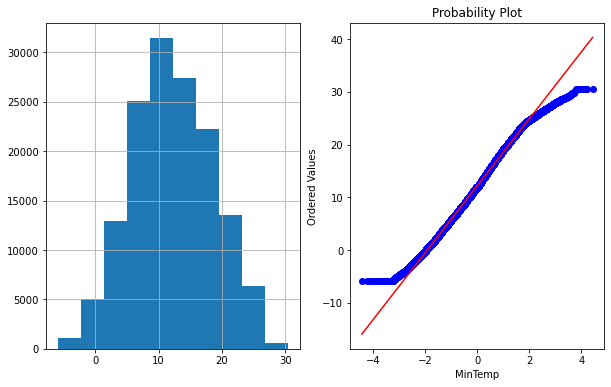

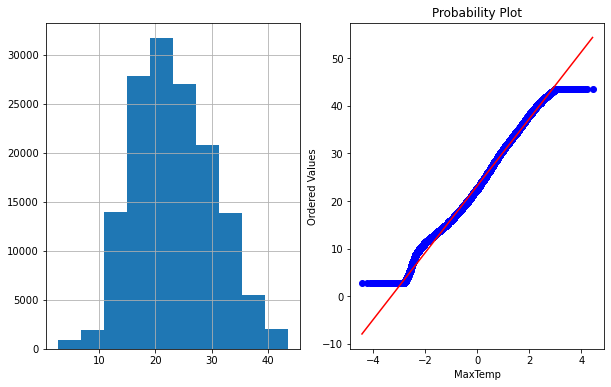

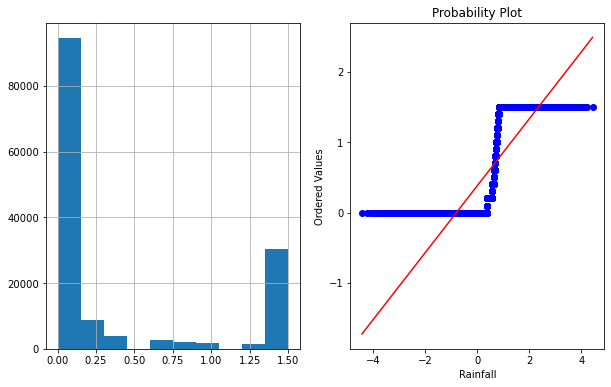

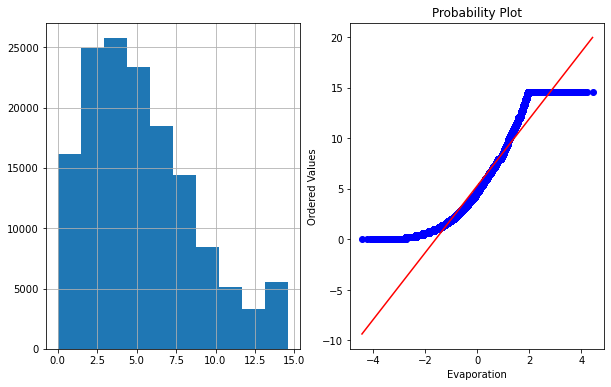

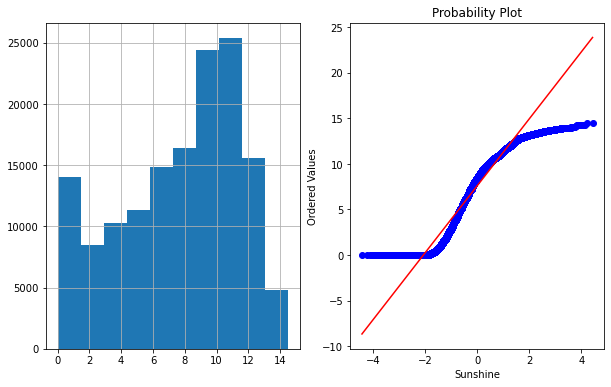

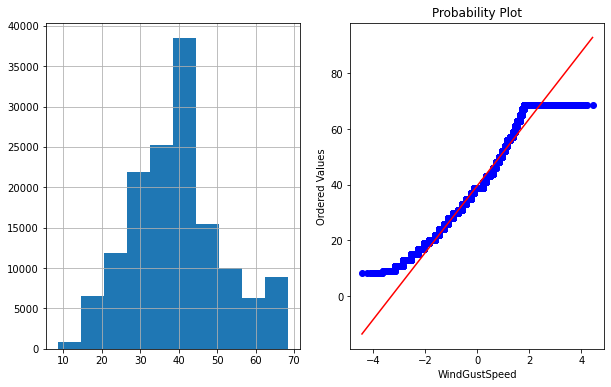

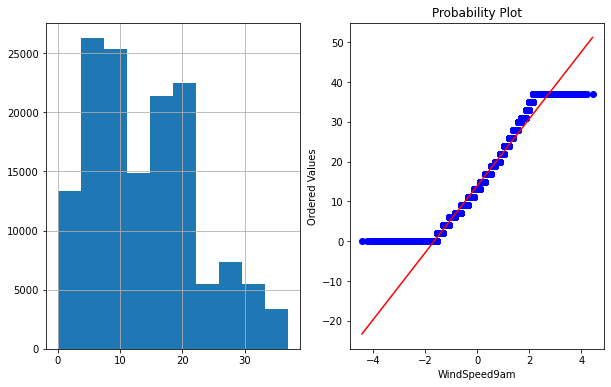

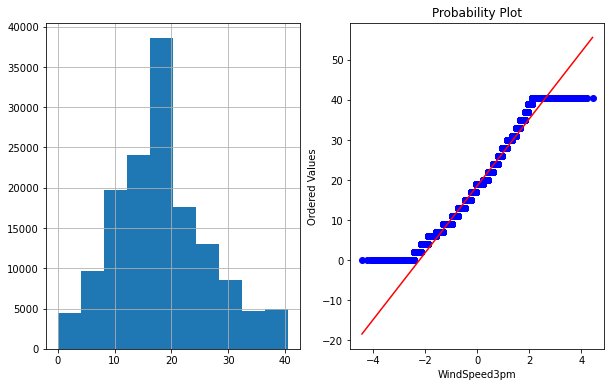

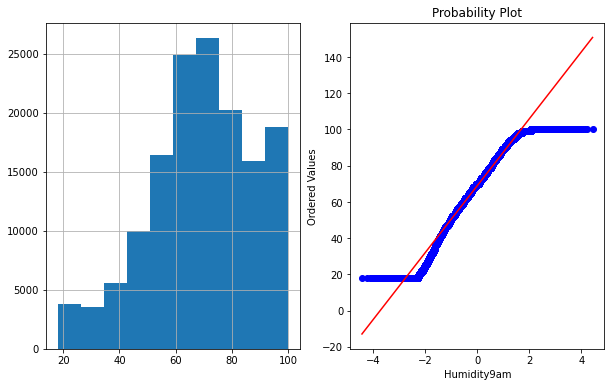

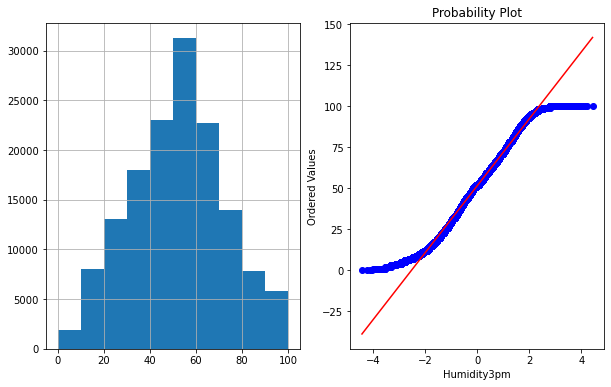

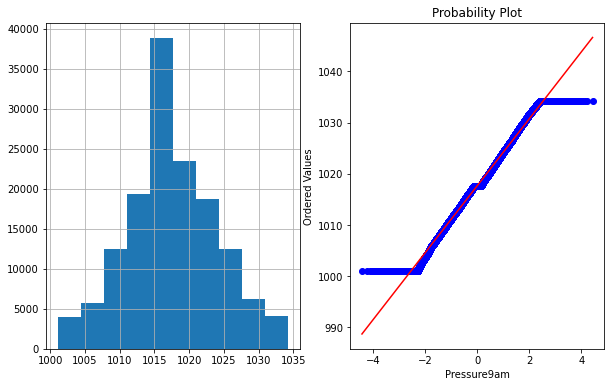

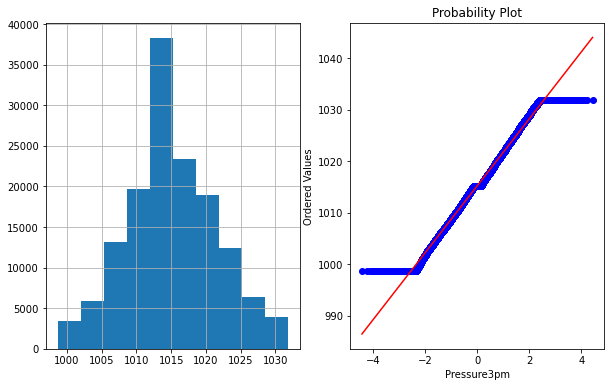

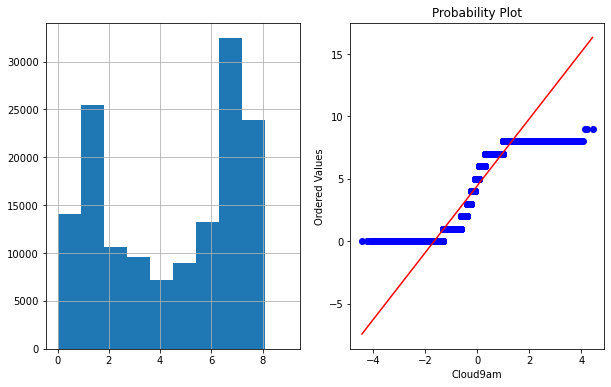

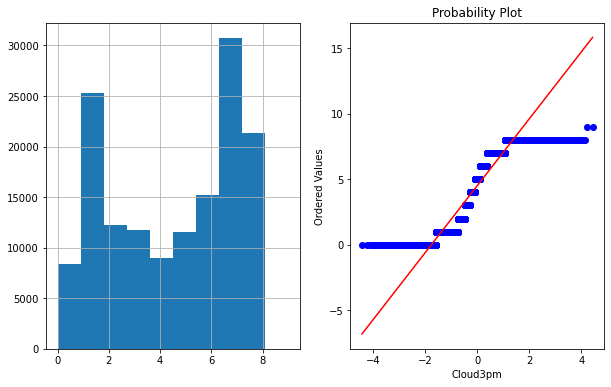

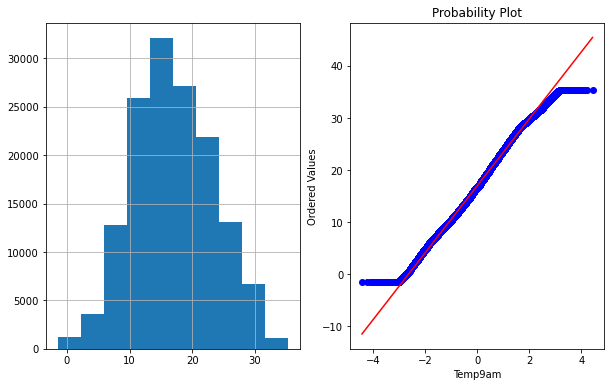

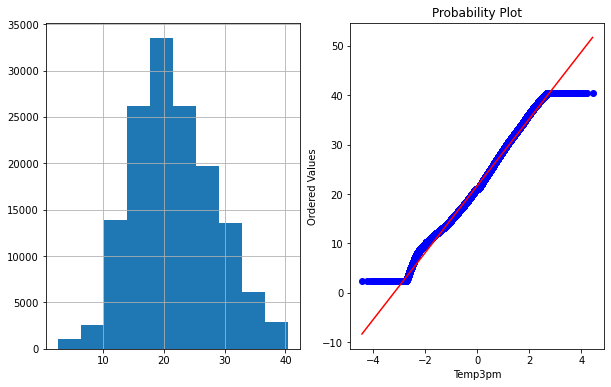

In [63]:
for feature in continuous_feature:
    plot_data(df, feature)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


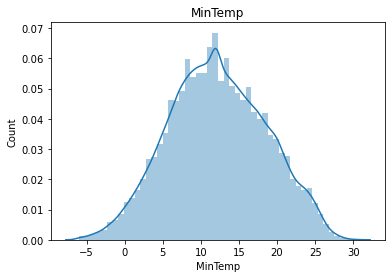

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


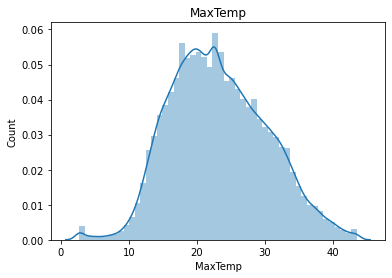

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


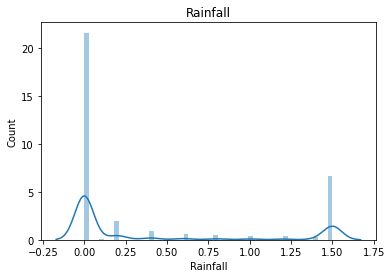

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


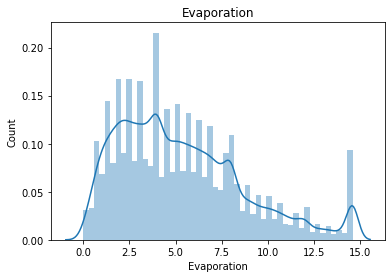

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


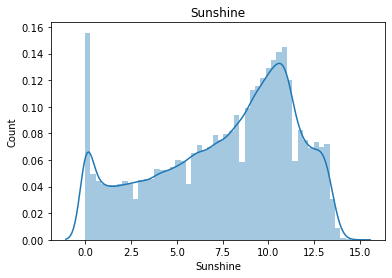

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


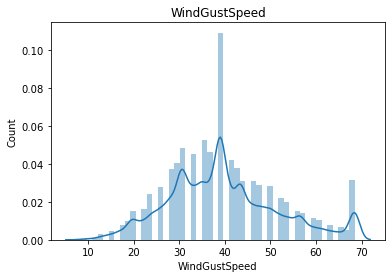

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


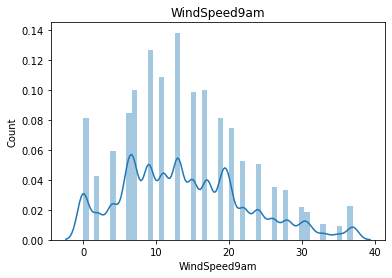

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


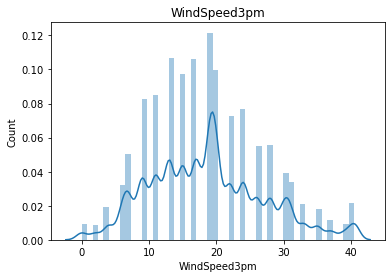

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


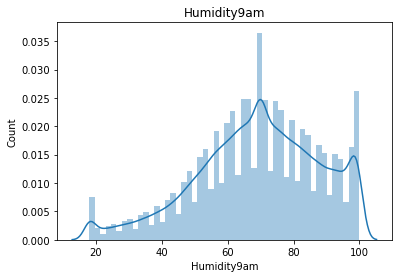

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


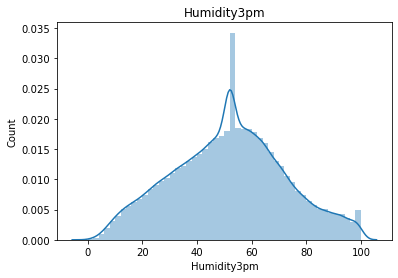

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


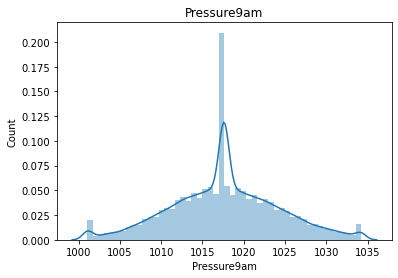

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


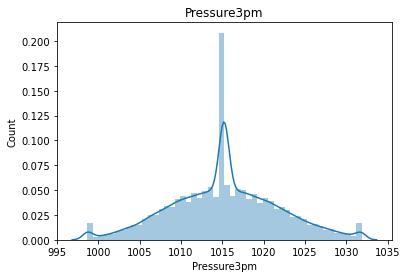

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


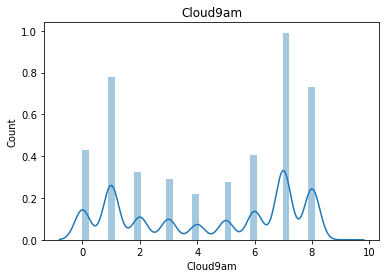

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


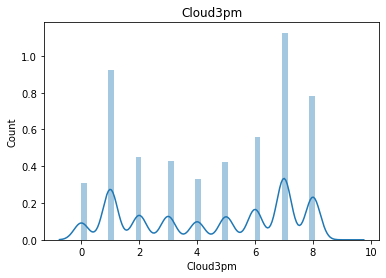

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


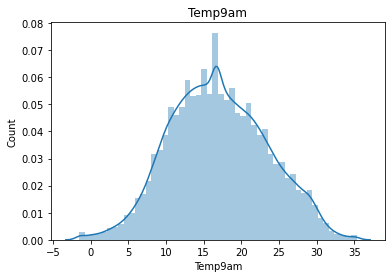

<Figure size 1080x1080 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


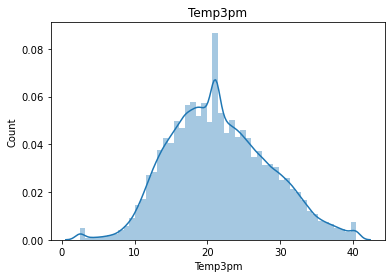

<Figure size 1080x1080 with 0 Axes>

In [64]:
for feature in continuous_feature:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [65]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,14.6,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [66]:
#data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")
df['Year']=pd.DatetimeIndex(df.Date).year
df['Day']=pd.DatetimeIndex(df.Date).day
df['Month']=pd.DatetimeIndex(df.Date).month

In [67]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,1007.1,8.0,0.0,16.9,21.8,No,No,2008,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,1007.8,7.0,1.0,17.2,24.3,No,No,2008,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,1008.7,8.0,2.0,21.0,23.2,No,No,2008,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,14.6,8.9,NE,24.0,SE,...,1012.8,0.0,5.0,18.1,26.5,No,No,2008,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,...,1020.3,1.0,1.0,10.1,22.4,No,No,2017,21,6
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,...,1019.1,8.0,5.0,10.9,24.5,No,No,2017,22,6
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,...,1016.8,8.0,1.0,12.5,26.1,No,No,2017,23,6
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,24,6


In [68]:
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])

In [69]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,2008-12-01,Albury,13.4,3.131137,0.6,2.4,8.3,W,3.784190,W,...,6.914830,8.0,0.0,16.9,3.081910,No,No,2008,1,12
1,2008-12-02,Albury,7.4,3.222868,0.0,3.6,10.0,WNW,3.784190,NNW,...,6.915525,7.0,1.0,17.2,3.190476,No,No,2008,2,12
2,2008-12-03,Albury,12.9,3.246491,0.0,2.6,4.4,WSW,3.828641,W,...,6.916418,8.0,2.0,21.0,3.144152,No,No,2008,3,12
3,2008-12-04,Albury,9.2,3.332205,0.0,14.6,8.9,NE,3.178054,SE,...,6.920474,0.0,5.0,18.1,3.277145,No,No,2008,4,12
4,2008-12-05,Albury,17.5,3.475067,1.0,5.4,3.0,W,3.713572,ENE,...,6.913737,7.0,8.0,17.8,3.391147,No,No,2008,5,12


In [70]:
df.drop(['Date'],axis=1,inplace=True)

In [71]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,Albury,13.4,3.131137,0.6,2.4,8.3,W,3.784190,W,WNW,...,6.914830,8.0,0.0,16.9,3.081910,No,No,2008,1,12
1,Albury,7.4,3.222868,0.0,3.6,10.0,WNW,3.784190,NNW,WSW,...,6.915525,7.0,1.0,17.2,3.190476,No,No,2008,2,12
2,Albury,12.9,3.246491,0.0,2.6,4.4,WSW,3.828641,W,WSW,...,6.916418,8.0,2.0,21.0,3.144152,No,No,2008,3,12
3,Albury,9.2,3.332205,0.0,14.6,8.9,NE,3.178054,SE,E,...,6.920474,0.0,5.0,18.1,3.277145,No,No,2008,4,12
4,Albury,17.5,3.475067,1.0,5.4,3.0,W,3.713572,ENE,NW,...,6.913737,7.0,8.0,17.8,3.391147,No,No,2008,5,12


In [72]:
##categorical features

df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
Day                  0
Month                0
dtype: int64

<AxesSubplot:>

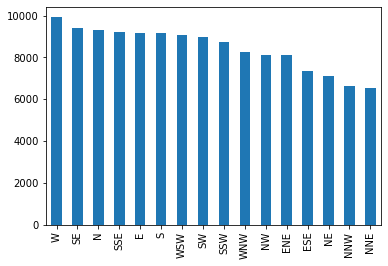

In [73]:
df['WindGustDir'].value_counts().sort_values(ascending=False).plot.bar()

In [74]:
df['WindGustDir'].value_counts().sort_values(ascending=False).index[0]

'W'

In [75]:
def impute_nan(df,variable):
    most_frequent_variable=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_variable, inplace=True)

In [76]:
impute_nan(df, 'WindGustDir')
impute_nan(df, 'WindDir9am')
impute_nan(df, 'WindDir3pm')

In [77]:
df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
Year                0
Day                 0
Month               0
dtype: int64

In [78]:
df['RainToday']=pd.get_dummies(df['RainToday'], drop_first=True)

In [79]:
df['RainTomorrow']=pd.get_dummies(df['RainTomorrow'], drop_first=True)

In [80]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,Albury,13.4,3.131137,0.6,2.4,8.3,W,3.784190,W,WNW,...,6.914830,8.0,0.0,16.9,3.081910,0,0,2008,1,12
1,Albury,7.4,3.222868,0.0,3.6,10.0,WNW,3.784190,NNW,WSW,...,6.915525,7.0,1.0,17.2,3.190476,0,0,2008,2,12
2,Albury,12.9,3.246491,0.0,2.6,4.4,WSW,3.828641,W,WSW,...,6.916418,8.0,2.0,21.0,3.144152,0,0,2008,3,12
3,Albury,9.2,3.332205,0.0,14.6,8.9,NE,3.178054,SE,E,...,6.920474,0.0,5.0,18.1,3.277145,0,0,2008,4,12
4,Albury,17.5,3.475067,1.0,5.4,3.0,W,3.713572,ENE,NW,...,6.913737,7.0,8.0,17.8,3.391147,0,0,2008,5,12
5,Albury,14.6,3.391147,0.2,5.2,11.6,WNW,4.025352,W,W,...,6.913141,8.0,5.0,20.6,3.363842,0,0,2008,6,12
6,Albury,14.3,3.218876,0.0,3.8,8.5,W,3.912023,SW,W,...,6.915922,1.0,8.0,18.1,3.202746,0,0,2008,7,12
7,Albury,7.7,3.284664,0.0,6.4,5.8,W,3.555348,SSE,W,...,6.917805,8.0,7.0,16.3,3.238678,0,0,2008,8,12
8,Albury,9.7,3.462606,0.0,3.0,6.1,NNW,4.226834,SE,NW,...,6.911349,1.0,8.0,18.3,3.407842,0,1,2008,9,12
9,Albury,13.1,3.404525,1.4,0.6,9.7,W,3.332205,S,SSE,...,6.913439,1.0,3.0,20.1,3.339322,1,0,2008,10,12


In [81]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Day              0
Month            0
dtype: int64

In [82]:
categorical_feature

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [83]:
lst=['RainToday','RainTomorrow']
for feature in categorical_feature:
    if feature in lst:
        pass
    else:
        print(feature, len(df[feature].unique()))

Location 49
WindGustDir 16
WindDir9am 16
WindDir3pm 16


In [84]:
ordinal_1=df.groupby('WindDir9am')['RainTomorrow'].mean().sort_values()
wd9={}
for i in range(16):
   wd9[ordinal_1.index[i]]=i

In [85]:
ordinal=df.groupby('WindGustDir')['RainTomorrow'].mean().sort_values()
wgd={}
for i in range(16):
    wgd[ordinal.index[i]]=i
wgd

{'E': 0,
 'ENE': 1,
 'ESE': 2,
 'SE': 3,
 'NE': 4,
 'SSE': 5,
 'SW': 6,
 'SSW': 7,
 'S': 8,
 'NNE': 9,
 'WSW': 10,
 'W': 11,
 'N': 12,
 'WNW': 13,
 'NW': 14,
 'NNW': 15}

In [86]:
ordinal_2=df.groupby('WindDir3pm')['RainTomorrow'].mean().sort_values()
wd3={}
for i in range(16):
    wd3[ordinal_2.index[i]]=i
wd3    

{'ESE': 0,
 'E': 1,
 'ENE': 2,
 'SSE': 3,
 'NE': 4,
 'SW': 5,
 'SE': 6,
 'S': 7,
 'SSW': 8,
 'WSW': 9,
 'NNE': 10,
 'W': 11,
 'WNW': 12,
 'N': 13,
 'NNW': 14,
 'NW': 15}

In [87]:
df['WindDir9am']=df['WindDir9am'].map(wd9)
df['WindGustDir']=df['WindGustDir'].map(wgd)
df['WindDir3pm']=df['WindDir3pm'].map(wd3)

In [88]:
df_1=df.groupby('Location')['RainTomorrow'].mean().sort_values()
df_1

Location
Woomera             0.067132
Uluru               0.073511
AliceSprings        0.080263
Mildura             0.108674
Cobar               0.128282
Moree               0.130941
Nhil                0.153359
SalmonGums          0.157281
PearceRAAF          0.167830
Katherine           0.167934
Townsville          0.170724
WaggaWagga          0.178132
Canberra            0.183062
Bendigo             0.184868
Richmond            0.186108
Tuggeranong         0.186904
PerthAirport        0.188435
BadgerysCreek       0.193752
Penrith             0.195788
Nuriootpa           0.196743
Melbourne           0.199186
Perth               0.202004
Albury              0.203289
Sale                0.213692
Adelaide            0.215471
MelbourneAirport    0.217016
Brisbane            0.222048
Launceston          0.229934
Williamtown         0.232635
Wollongong          0.234539
Hobart              0.238334
Newcastle           0.240540
Watsonia            0.245264
GoldCoast           0.254934
Balla

In [89]:
location={}
for i in range(49):
    location[df_1.index[i]]=i

In [90]:
location

{'Woomera': 0,
 'Uluru': 1,
 'AliceSprings': 2,
 'Mildura': 3,
 'Cobar': 4,
 'Moree': 5,
 'Nhil': 6,
 'SalmonGums': 7,
 'PearceRAAF': 8,
 'Katherine': 9,
 'Townsville': 10,
 'WaggaWagga': 11,
 'Canberra': 12,
 'Bendigo': 13,
 'Richmond': 14,
 'Tuggeranong': 15,
 'PerthAirport': 16,
 'BadgerysCreek': 17,
 'Penrith': 18,
 'Nuriootpa': 19,
 'Melbourne': 20,
 'Perth': 21,
 'Albury': 22,
 'Sale': 23,
 'Adelaide': 24,
 'MelbourneAirport': 25,
 'Brisbane': 26,
 'Launceston': 27,
 'Williamtown': 28,
 'Wollongong': 29,
 'Hobart': 30,
 'Newcastle': 31,
 'Watsonia': 32,
 'GoldCoast': 33,
 'Ballarat': 34,
 'SydneyAirport': 35,
 'Sydney': 36,
 'Darwin': 37,
 'NorahHead': 38,
 'MountGinini': 39,
 'CoffsHarbour': 40,
 'Witchcliffe': 41,
 'Albany': 42,
 'MountGambier': 43,
 'NorfolkIsland': 44,
 'Dartmoor': 45,
 'Cairns': 46,
 'Walpole': 47,
 'Portland': 48}

In [91]:
df['Location']=df['Location'].map(location)

In [92]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Day,Month
0,22,13.4,3.131137,0.6,2.4,8.3,11,3.784190,11,12,...,6.914830,8.0,0.0,16.9,3.081910,0,0,2008,1,12
1,22,7.4,3.222868,0.0,3.6,10.0,13,3.784190,15,9,...,6.915525,7.0,1.0,17.2,3.190476,0,0,2008,2,12
2,22,12.9,3.246491,0.0,2.6,4.4,10,3.828641,11,9,...,6.916418,8.0,2.0,21.0,3.144152,0,0,2008,3,12
3,22,9.2,3.332205,0.0,14.6,8.9,4,3.178054,2,1,...,6.920474,0.0,5.0,18.1,3.277145,0,0,2008,4,12
4,22,17.5,3.475067,1.0,5.4,3.0,11,3.713572,3,15,...,6.913737,7.0,8.0,17.8,3.391147,0,0,2008,5,12


In [93]:
## imbalanced data
df['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

# Feature Selection

In [94]:
y=df['RainTomorrow']
X=df.drop('RainTomorrow',axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [96]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [97]:
data_train = pd.DataFrame(X_train, columns=X.columns)
data_test= pd.DataFrame(X_test, columns=X.columns)

In [98]:
data_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Day,Month
0,0.791667,0.493132,0.764415,0.000000,0.205479,0.710345,0.733333,0.730074,0.666667,0.400000,...,0.502572,0.502582,0.777778,0.444444,0.494428,0.767904,0.0,0.6,0.766667,0.636364
1,0.312500,0.548077,0.754734,0.000000,0.958904,0.268966,0.266667,0.535771,0.200000,0.266667,...,0.724649,0.691747,0.777778,0.666667,0.442783,0.741604,0.0,0.3,0.766667,1.000000
2,0.479167,0.407967,0.762819,0.000000,0.342466,0.462069,0.200000,0.787880,0.600000,0.200000,...,0.643807,0.661799,0.888889,0.555556,0.472683,0.752358,0.0,0.6,0.500000,1.000000
3,0.895833,0.410714,0.952313,0.000000,0.328767,0.937931,0.733333,0.849140,0.866667,0.733333,...,0.418122,0.387914,0.666667,0.666667,0.755368,0.959424,0.0,0.8,0.966667,1.000000
4,0.791667,0.674451,0.854123,0.000000,0.479452,0.262069,0.333333,0.849140,0.933333,0.466667,...,0.205973,0.315270,0.666667,0.111111,0.681979,0.787630,0.0,0.7,0.200000,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,0.520833,0.388736,0.579037,0.266667,0.027397,0.406897,0.333333,0.678217,0.466667,0.466667,...,0.694732,0.787385,0.666667,0.666667,0.323186,0.572525,0.0,0.4,0.300000,0.454545
116364,0.541667,0.688187,0.850382,0.000000,0.547945,0.737931,0.200000,0.620060,0.466667,0.400000,...,0.418122,0.460386,0.333333,0.333333,0.739060,0.861082,0.0,0.4,0.833333,0.181818
116365,0.500000,0.495879,0.727568,0.400000,0.972603,0.482759,0.666667,0.754040,0.466667,0.466667,...,0.399995,0.487519,0.444444,0.111111,0.445501,0.680202,0.0,0.1,0.433333,1.000000
116366,0.458333,0.438187,0.633352,1.000000,0.438356,0.710345,0.400000,0.776864,0.600000,0.600000,...,0.178590,0.297082,0.888889,0.666667,0.323186,0.639006,1.0,1.0,0.833333,0.272727


In [99]:
data_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Day,Month
0,0.979167,0.498626,0.812058,0.000000,0.246575,0.751724,0.266667,0.754040,0.866667,0.666667,...,0.802295,0.808265,0.111111,0.777778,0.483555,0.829814,0.0,0.8,0.600000,0.272727
1,0.520833,0.325549,0.754734,0.000000,0.273973,0.613793,0.533333,0.620060,0.466667,0.466667,...,0.664786,0.640818,0.777778,0.555556,0.374830,0.761078,0.0,0.8,0.766667,0.818182
2,0.458333,0.570055,0.898424,0.000000,0.301370,0.234483,0.400000,0.604347,0.200000,0.933333,...,0.499560,0.454353,0.111111,0.111111,0.619462,0.900475,0.0,0.3,0.100000,0.000000
3,0.895833,0.484890,0.720444,0.000000,0.315068,0.682759,0.133333,0.604347,0.000000,0.200000,...,0.772454,0.757530,0.888889,0.777778,0.418320,0.736103,0.0,1.0,0.366667,0.272727
4,0.541667,0.721154,0.838919,0.000000,0.602740,0.400000,0.133333,0.650020,0.066667,0.000000,...,0.556739,0.589803,0.777778,0.777778,0.730905,0.829814,0.0,0.2,0.566667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,0.666667,0.473901,0.850382,0.000000,0.287671,0.868966,0.533333,0.620060,0.266667,0.333333,...,0.715677,0.673782,0.222222,0.000000,0.486273,0.834051,0.0,0.8,0.266667,0.090909
29088,0.729167,0.712912,0.950419,0.000000,0.547945,0.717241,0.533333,0.974867,1.000000,0.266667,...,0.275841,0.227261,0.111111,0.555556,0.801577,0.937000,0.0,0.8,0.000000,1.000000
29089,0.833333,0.438187,0.831069,0.000000,0.657534,0.634483,0.600000,0.704847,0.933333,0.866667,...,0.538694,0.472448,0.777778,0.222222,0.597717,0.842378,0.0,0.8,0.033333,0.636364
29090,0.229167,0.375000,0.609674,1.000000,0.164384,0.510345,0.733333,0.886020,0.733333,0.733333,...,0.294041,0.421152,0.777778,0.333333,0.306877,0.616474,1.0,0.5,0.933333,0.727273


In [100]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(data_train,y_train)

ExtraTreesClassifier()

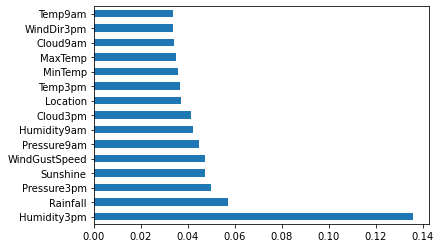

In [101]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

In [102]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [103]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(data_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [104]:
selected_col=X.columns[feature_sel_model.get_support()]
selected_col

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'WindDir3pm', 'Humidity3pm',
       'Pressure3pm', 'Cloud3pm', 'RainToday'],
      dtype='object')

In [105]:
data_train=data_train[selected_col]

In [106]:
data_test=data_test[selected_col]

In [107]:
data_train

,Rainfall,Sunshine,WindGustSpeed,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,RainToday
0,0.000000,0.710345,0.730074,0.400000,0.52,0.502582,0.444444,0.0
1,0.000000,0.268966,0.535771,0.266667,0.62,0.691747,0.666667,0.0
2,0.000000,0.462069,0.787880,0.200000,0.66,0.661799,0.555556,0.0
3,0.000000,0.937931,0.849140,0.733333,0.10,0.387914,0.666667,0.0
4,0.000000,0.262069,0.849140,0.466667,0.66,0.315270,0.111111,0.0
...,...,...,...,...,...,...,...,...
116363,0.266667,0.406897,0.678217,0.466667,0.64,0.787385,0.666667,0.0
116364,0.000000,0.737931,0.620060,0.400000,0.48,0.460386,0.333333,0.0
116365,0.400000,0.482759,0.754040,0.466667,0.63,0.487519,0.111111,0.0
116366,1.000000,0.710345,0.776864,0.600000,0.59,0.297082,0.666667,1.0


In [108]:
data_test

,Rainfall,Sunshine,WindGustSpeed,WindDir3pm,Humidity3pm,Pressure3pm,Cloud3pm,RainToday
0,0.000000,0.751724,0.754040,0.666667,0.47,0.808265,0.777778,0.0
1,0.000000,0.613793,0.620060,0.466667,0.42,0.640818,0.555556,0.0
2,0.000000,0.234483,0.604347,0.933333,0.24,0.454353,0.111111,0.0
3,0.000000,0.682759,0.604347,0.200000,0.58,0.757530,0.777778,0.0
4,0.000000,0.400000,0.650020,0.000000,0.56,0.589803,0.777778,0.0
...,...,...,...,...,...,...,...,...
29087,0.000000,0.868966,0.620060,0.333333,0.46,0.673782,0.000000,0.0
29088,0.000000,0.717241,0.974867,0.266667,0.28,0.227261,0.555556,0.0
29089,0.000000,0.634483,0.704847,0.866667,0.35,0.472448,0.222222,0.0
29090,1.000000,0.510345,0.886020,0.733333,0.25,0.421152,0.333333,1.0


In [109]:
from imblearn.combine import SMOTETomek

In [110]:
from collections import Counter
os=SMOTETomek(random_state=0)
data_train_ns,y_train_ns=os.fit_resample(data_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 90879, 1: 25489})
The number of classes after fit Counter({0: 89545, 1: 89545})


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score

In [114]:
rf_randomcv=RandomForestClassifier()

### fit the randomized model
rf_randomcv.fit(data_train_ns, y_train_ns)

RandomForestClassifier()

In [115]:
prediction=rf_randomcv.predict(data_test)

In [116]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[20385  2319]
 [ 2611  3777]]
0.8305376048398185
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     22704
           1       0.62      0.59      0.61      6388

    accuracy                           0.83     29092
   macro avg       0.75      0.74      0.75     29092
weighted avg       0.83      0.83      0.83     29092



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

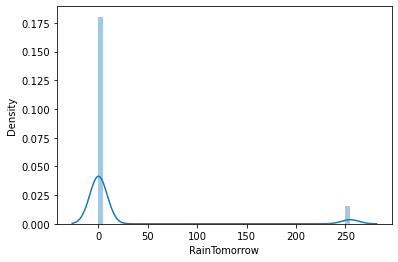

In [117]:
sns.distplot(y_test-prediction)

In [119]:
print(roc_auc_score(y_test, rf_randomcv.predict_proba(data_test)[:,1],multi_class='ovo'))
#The function predict_proba() returns a numpy array of two columns. The first column is the probability that target=0 and the second column is the probability that target=1 . That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1 

0.8537348929712291


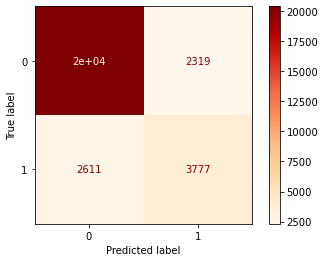

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_randomcv,data_test,y_test,cmap='OrRd')

0.7445621398340705

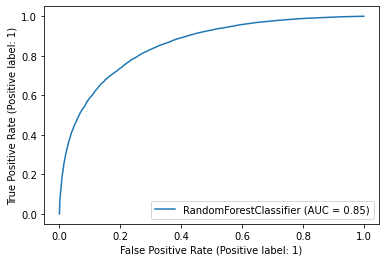

In [121]:
from sklearn import metrics
metrics.plot_roc_curve(rf_randomcv, data_test, y_test)
metrics.roc_auc_score(y_test, prediction, average=None) 
#Classifiers that give curves closer to the top-left corner indicate a better performance. 

In [ ]:
#pickling

In [123]:
import pickle

In [124]:
# open a file, where you ant to store the data
file = open('rainfall_prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_randomcv, file)

In [ ]:
#feat=np.array([[1,0,0.5,1.7,1,1.5,1,1,1]])
#feat=feat.reshape(1,9)


In [ ]:
#clf.predict(feat)